# Credit Card Default

## Data Description

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

default payment next month - positive(minority class) - default(1), negative class(majority class) - no default(0)

## Import Packages

In [2]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='white')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,roc_curve,precision_score,recall_score,confusion_matrix,precision_recall_curve
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,RobustScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

# Import Data

In [3]:
#Load dataset
raw_data = pd.read_excel('C:/Users/USER/Documents/2. NTU Fintech/Trimester 1/MH6811 Machine Learning in Finance/Group Project/Default Credit.xls', skiprows=[0])

In [4]:
# Duplicate Data for later usage
Credit_Data = raw_data # Exploration
data = raw_data # Modelling

## Data Exploration

In [6]:
# Rename column heads
Credit_Data = Credit_Data.rename(columns={'default payment next month': 'DEFAULT', 'SEX': 'GENDER', 'PAY_0': 'PAY_1'})
data = data.rename(columns={'default payment next month': 'DEFAULT', 'SEX': 'GENDER', 'PAY_0': 'PAY_1'})
print(Credit_Data.columns)

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


**Explanantion of upper cell**

We have 24 feature columns and 1 target column. 

Rename: 
- 'default payment next month' to 'DEFAULT'
- 'SEX' to 'GENDER'
- PAY_0' to 'PAY_1' 

for easier usage and identification

In [5]:
Credit_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
GENDER       30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [6]:
Credit_Data.head()

ID  LIMIT_BAL  GENDER  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0   1      20000       2          2         1   24      2      2     -1   
1   2     120000       2          2         2   26     -1      2      0   
2   3      90000       2          2         2   34      0      0      0   
3   4      50000       2          2         1   37      0      0      0   
4   5      50000       1          2         1   57     -1      0     -1   

   PAY_4   ...     BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -1   ...             0          0          0         0       689   
1      0   ...          3272       3455       3261         0      1000   
2      0   ...         14331      14948      15549      1518      1500   
3      0   ...         28314      28959      29547      2000      2019   
4      0   ...         20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT  
0         0         0         0         0        1  
1      1000      1000         0      2000        1  
2      1000      1000      1000      5000        0  
3      1200      1100      1069      1000        0  
4     10000      9000       689       679        0  

[5 rows x 25 columns]

In [7]:
Credit_Data.describe().T

count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
GENDER     30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   3558.75   
BILL_AMT2  30000.0   49179.075167   71173.768783  -69777.0   2984.75   
BILL_AMT3  30000.0   47013.154800   69349.387427 -157264.0   2666.25   
BILL_AMT4  30000.0   43262.948967   64332.856134 -170000.0   2326.75   
BILL_AMT5  30000.0   40311.400967   60797.155770  -81334.0   1763.00   
BILL_AMT6  30000.0   38871.760400   59554.107537 -339603.0   1256.00   
PAY_AMT1   30000.0    5663.580500   16563.280354       0.0   1000.00   
PAY_AMT2   30000.0    5921.163500   23040.870402       0.0    833.00   
PAY_AMT3   30000.0    5225.681500   17606.961470       0.0    390.00   
PAY_AMT4   30000.0    4826.076867   15666.159744       0.0    296.00   
PAY_AMT5   30000.0    4799.387633   15278.305679       0.0    252.50   
PAY_AMT6   30000.0    5215.502567   17777.465775       0.0    117.75   
DEFAULT    30000.0       0.221200       0.415062       0.0      0.00   

                50%        75%        max  
ID          15000.5   22500.25    30000.0  
LIMIT_BAL  140000.0  240000.00  1000000.0  
GENDER          2.0       2.00        2.0  
EDUCATION       2.0       2.00        6.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_1           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        8.0  
PAY_6           0.0       0.00        8.0  
BILL_AMT1   22381.5   67091.00   964511.0  
BILL_AMT2   21200.0   64006.25   983931.0  
BILL_AMT3   20088.5   60164.75  1664089.0  
BILL_AMT4   19052.0   54506.00   891586.0  
BILL_AMT5   18104.5   50190.50   927171.0  
BILL_AMT6   17071.0   49198.25   961664.0  
PAY_AMT1     2100.0    5006.00   873552.0  
PAY_AMT2     2009.0    5000.00  1684259.0  
PAY_AMT3     1800.0    4505.00   896040.0  
PAY_AMT4     1500.0    4013.25   621000.0  
PAY_AMT5     1500.0    4031.50   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
DEFAULT         0.0       0.00        1.0

In [8]:
# Check for missing values
Credit_Data.isnull().sum()

ID           0
LIMIT_BAL    0
GENDER       0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

**Explanantion of upper cell**

Our dataset does not contain any null values.

In [9]:
print('Shape of our data {}'.format(data.shape))

Shape of our data (30000, 25)


**Explanantion of upper cell**

Our data set has 30000 rows and 25 columns.

In [10]:
# Count of GENDER, EDUCATION and MARRIAGE
for x in ["GENDER","EDUCATION","MARRIAGE"]:
    y=pd.DataFrame(Credit_Data[x].value_counts().sort_index())
    print(y)

   GENDER
1   11888
2   18112
   EDUCATION
0         14
1      10585
2      14030
3       4917
4        123
5        280
6         51
   MARRIAGE
0        54
1     13659
2     15964
3       323


**Explanantion of upper cell**

- 11888 Male and 18112 Female
- 7 levels of Education
- 4 levels of Martial status

In [94]:
# Count of Repayment Status
for num in range(1,7):
    print(Credit_Data['PAY_'+ str(num)].value_counts().sort_index())

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_1, dtype: int64
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: PAY_2, dtype: int64
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: PAY_3, dtype: int64
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: PAY_4, dtype: int64
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: PAY_5, dtype: int64
-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: PAY_6, dtype: int64


**Explanantion of upper cell**

- 11 levels of repayment status

In [12]:
# Count of DEFAULT
Credit_Data.groupby('DEFAULT').size()

DEFAULT
0    23364
1     6636
dtype: int64

**Explanantion of upper cell**

- 23364 non-default payment and 6636 default payment

## Data Visualization

### Taget Variable

Text(0.5,1,'COUNT OF Default Payment')

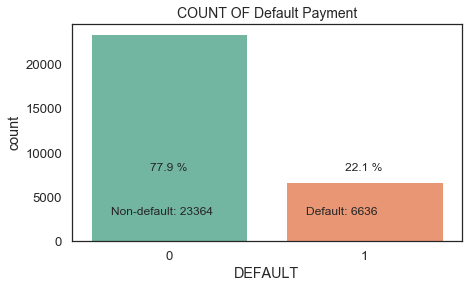

In [7]:
# The frequency of defaults
yes = Credit_Data['DEFAULT'].sum()
no = len(Credit_Data)-yes
# Percentage
yes_perc = round(yes/len(Credit_Data)*100, 1)
no_perc = round(no/len(Credit_Data)*100, 1)
import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('DEFAULT',data=Credit_Data, palette="Set2")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF Default Payment', size=14)

**Explanantion of upper cell**

We can see that from the graph, the percentage of non-default and default payment are 77.9 % and 22.1 % respectively. This will imply that there is a serious class imbalance issue in our data.

### Categorical Variable

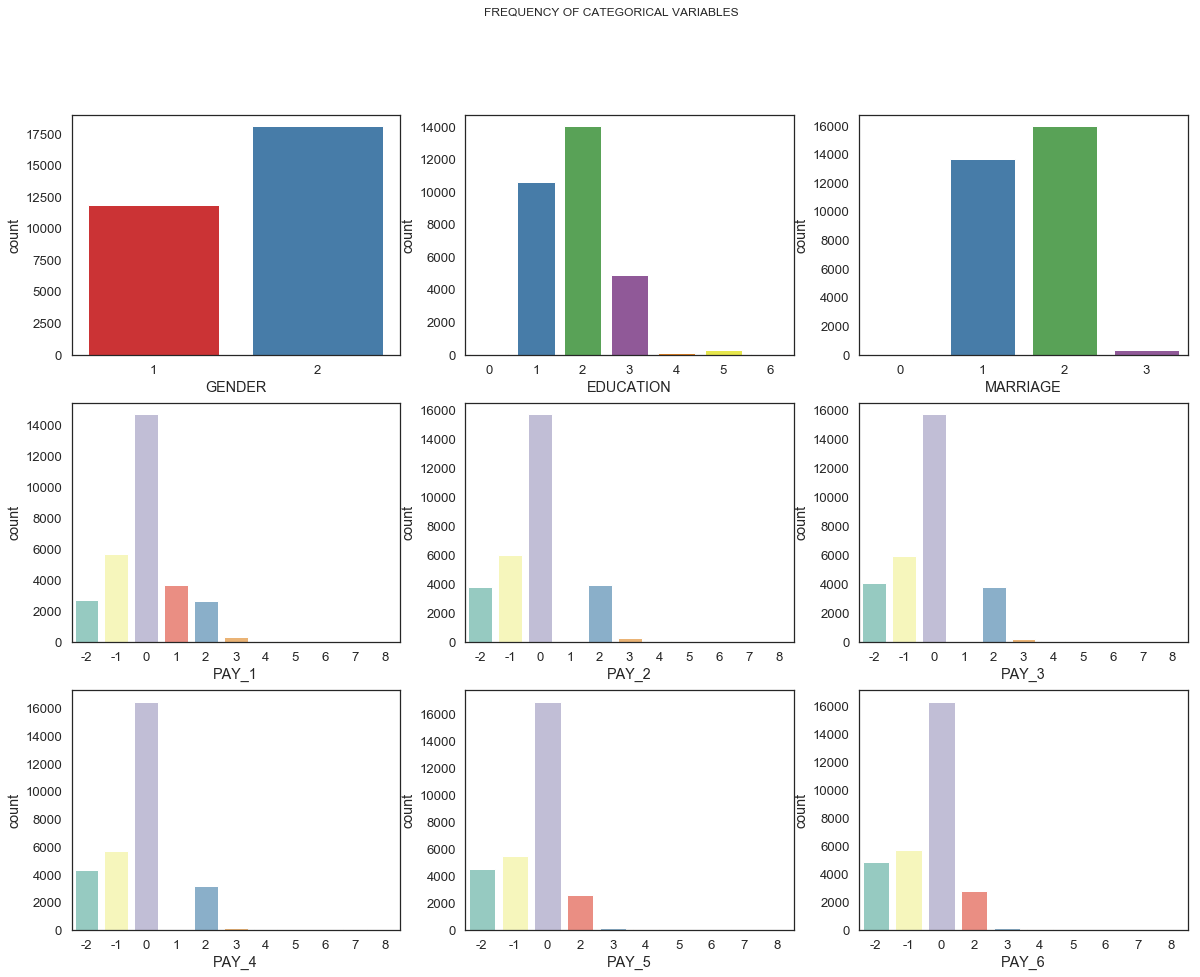

In [98]:
## Combination plot of Categorical variables
cat_subset = Credit_Data[['GENDER', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6', 'DEFAULT']]
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES')
ax1 = sns.countplot(x="GENDER", data=cat_subset, palette="Set1", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", data=cat_subset, palette="Set1",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE",  data=cat_subset, palette="Set1",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", data=cat_subset, palette="Set3", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", data=cat_subset, palette="Set3", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", data=cat_subset, palette="Set3", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", data=cat_subset, palette="Set3", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", data=cat_subset, palette="Set3", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", data=cat_subset, palette="Set3", ax=axes[2,2])
plt.show()

**Explanantion of upper cell**

- **GENDER**: We do not have any unknown labels. 1=Male and 2=Female.

- **EDUCATION**: We have unknown labels of 0,5,6 in education. Since the number of datas for 0,5,6 are not alot, we can clutter these labels together as unknown. Known labels are 1= Graduate, 2= University student, 3 = high school and 4 = others.

- **MARRIAGE**: We have unknown labels of 0. 

- **Repayment Status**: We have unknown labels of 0 and -2 in our data, we can see that the number of repayment status of label 0 in each month is the highest and label 0 is the majority class, hence, if we remove the unknown observations, it would have a great loss. For now, we just leave it first at this stage. We will investigate further later.

### Target and Demographic Variables

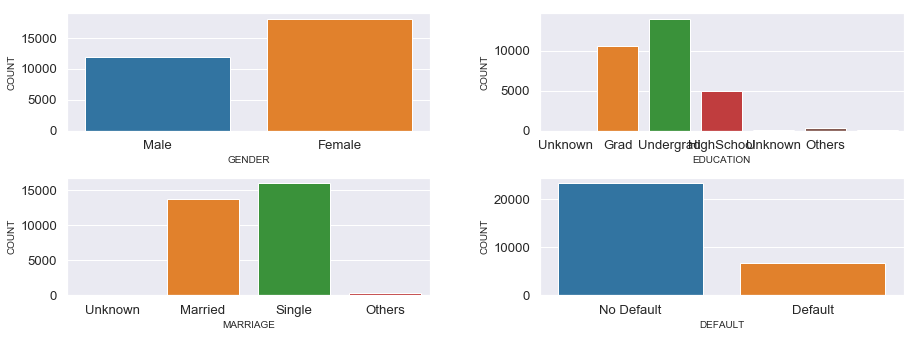

In [42]:
#Data distrubution of the categorical attributes- Draw countplot  
sns.set_style("darkgrid")
fig1, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(15,4))
df1=data.loc[:,['GENDER','EDUCATION','MARRIAGE','DEFAULT']]
axes_1=[ax1, ax2, ax3,ax4]
GENDER_label=['Male','Female']
EDUCATION_label=['Unknown','Grad','Undergrad','HighSchool','Unknown','Others']
MARRIAGE_label=['Unknown','Married','Single','Others']
DEFAULT_label=['No Default','Default']
xtick_labels_1=[GENDER_label,EDUCATION_label,MARRIAGE_label,DEFAULT_label]
for i in range(0,4):
    sns.countplot(x=df1.columns[i],data=df1,ax=axes_1[i])
    xlbl=axes_1[i].get_xlabel()
    axes_1[i].set_xlabel(xlbl,fontsize=10)
    axes_1[i].set_ylabel('COUNT',fontsize=10)
    axes_1[i].set_xticklabels(xtick_labels_1[i])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.3)
plt.show()

### Categorical variables against target

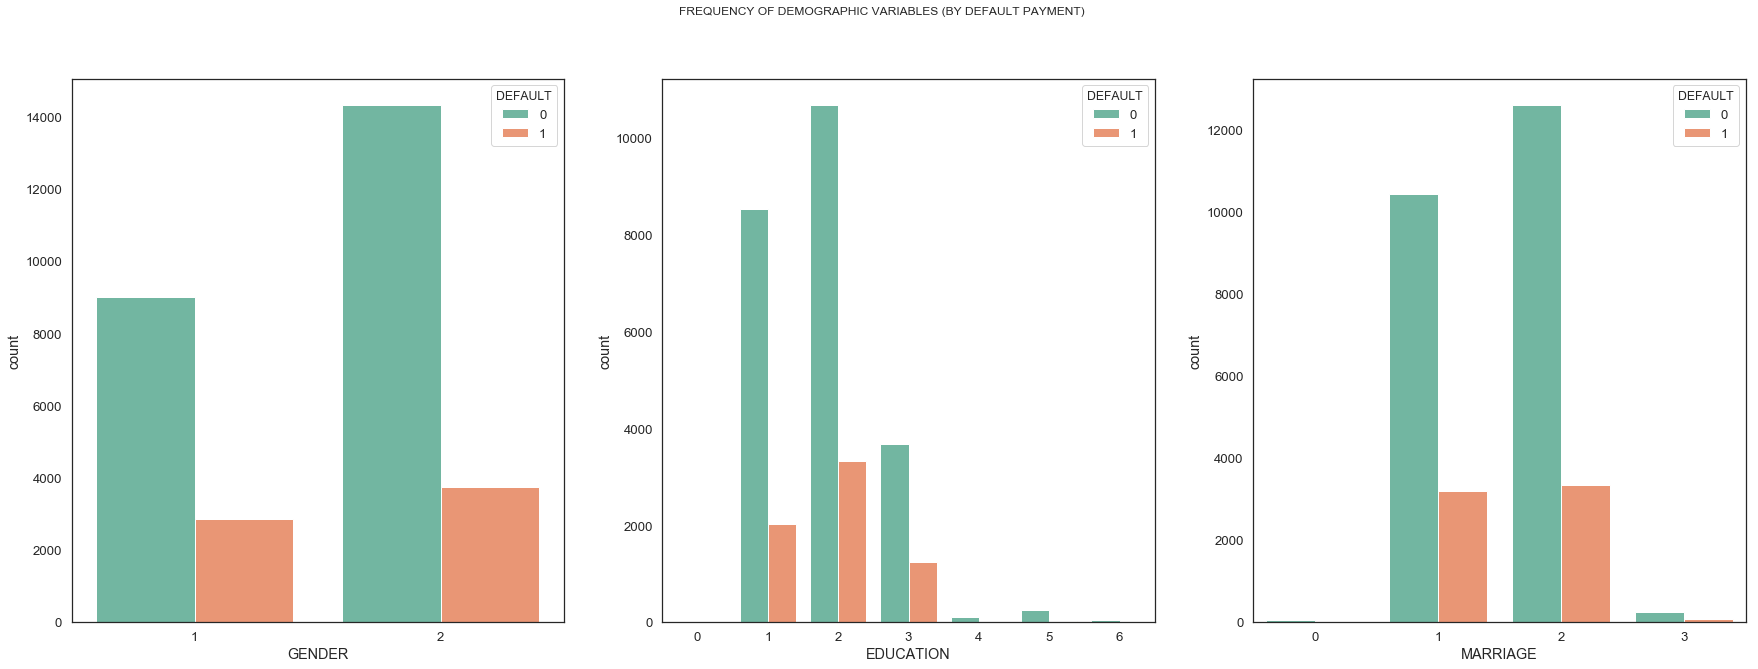

In [110]:
# Count plot: Education, Martial Status, SEX with target
sns.set_style("white")
subset = Credit_Data[['GENDER', 'EDUCATION', 'MARRIAGE','DEFAULT']]
f, axes = plt.subplots(1, 3, figsize=(30, 10), facecolor='white')
f.suptitle('FREQUENCY OF DEMOGRAPHIC VARIABLES (BY DEFAULT PAYMENT)')
ax1 = sns.countplot(x="GENDER", hue="DEFAULT", data=subset, palette="Set1", ax=axes[0])
ax2 = sns.countplot(x="EDUCATION", hue="DEFAULT", data=subset, palette="Set2",ax=axes[1])
ax3 = sns.countplot(x="MARRIAGE", hue="DEFAULT", data=subset, palette="Set2",ax=axes[2])
plt.show()

**Explanantion of upper cell**

Observe: 
- **GENDER**: More data on the default and non-default for female than male
- **EDUCATION**: More data on default and non-default for university student
- **MARRIAGE**: Number of default data for married and single are about the same while the non-default data for graduate is lower than that of university student

<Figure size 14400x432 with 0 Axes>

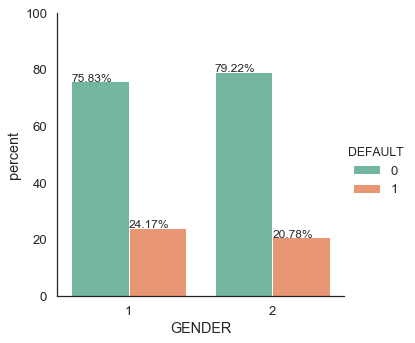

<Figure size 14400x432 with 0 Axes>

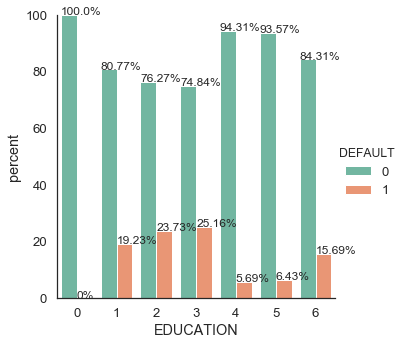

<Figure size 14400x432 with 0 Axes>

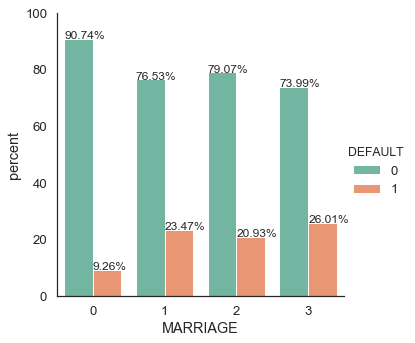

In [8]:
# Percentage plot: Education, Martial Status, SEX with target
subset = Credit_Data[['GENDER', 'EDUCATION', 'MARRIAGE','DEFAULT']]
x,y = ['GENDER', 'EDUCATION', 'MARRIAGE'], 'DEFAULT' 
for i in range(3): 
    df_subset = subset.groupby(x[i])[y].value_counts(normalize=True)
    df_subset = df_subset.mul(100)
    df_subset = df_subset.rename('percent').reset_index()

    plt.figure(figsize=(200, 6))
    g = sns.catplot(x=x[i],y='percent',hue=y,kind='bar',data=df_subset, palette="Set2")
    g.ax.set_ylim(0,100)
    plt.box(True)
    
    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        if np.isnan(txt_y):
            txt_y = 0
            txt = str('0') + '%'
        g.ax.text(txt_x,txt_y,txt, fontsize=12)

**Explanantion of upper cell**

Observe: 
- There is not much difference in defaulting between the two gender. However, slightly higher percentage of male default than female default for prelimary analysis
- People in university and high school are more likely to default than people who are a graduate
- People who are married at more likely to default than single

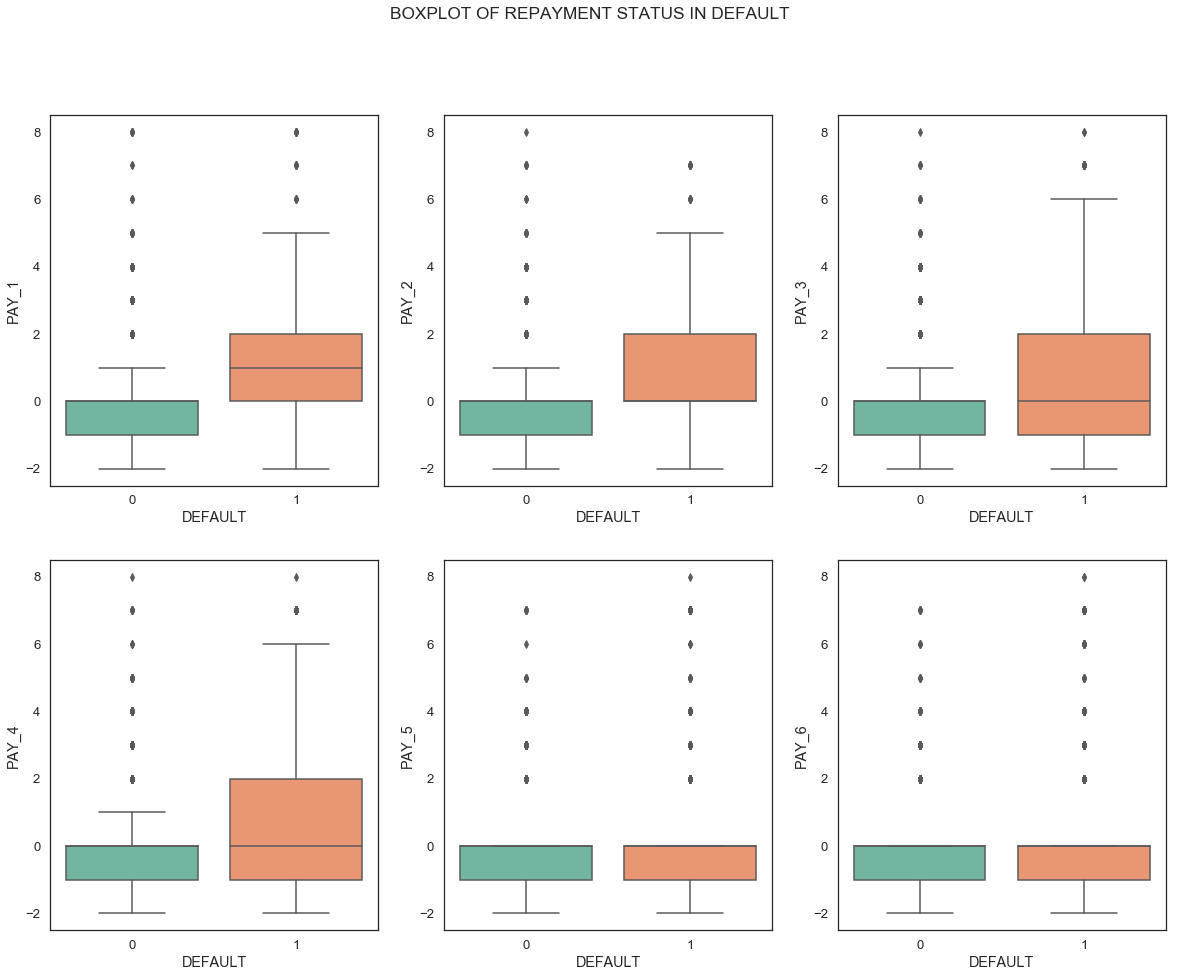

In [17]:
# Repayment status by target
# Box plot
fig, axes = plt.subplots(2, 3, figsize=(20,15))
fig.suptitle('BOXPLOT OF REPAYMENT STATUS IN DEFAULT')
ax1 = sns.boxplot(ax = axes[0,0], x="DEFAULT", y="PAY_1",data=Credit_Data, palette="Set2",showfliers=True)
ax2 = sns.boxplot(ax = axes[0,1], x="DEFAULT", y="PAY_2",data=Credit_Data, palette="Set2",showfliers=True)
ax3 = sns.boxplot(ax = axes[0,2], x="DEFAULT", y="PAY_3",data=Credit_Data, palette="Set2",showfliers=True)
ax4 = sns.boxplot(ax = axes[1,0], x="DEFAULT", y="PAY_4",data=Credit_Data, palette="Set2",showfliers=True)
ax5 = sns.boxplot(ax = axes[1,1], x="DEFAULT", y="PAY_5",data=Credit_Data, palette="Set2",showfliers=True)
ax6 = sns.boxplot(ax = axes[1,2], x="DEFAULT", y="PAY_6",data=Credit_Data, palette="Set2",showfliers=True)
plt.show();

**Explanantion of upper cell**

Observe:
- In september and august, there is more distinctive between the default and non-default. It seems that PAY_1 (Repayment status in September) and PAY_2 (Repayment status in August) have more discriminatory power than the repayment status in other months.

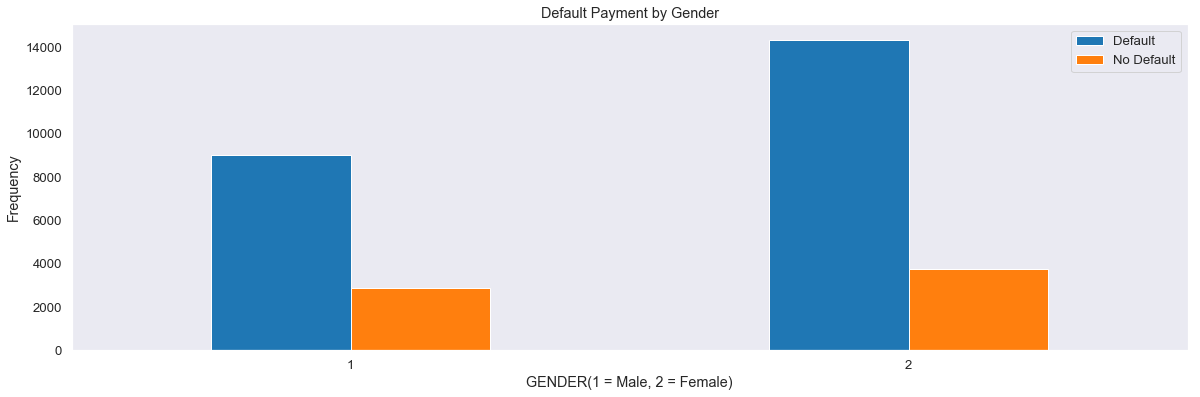

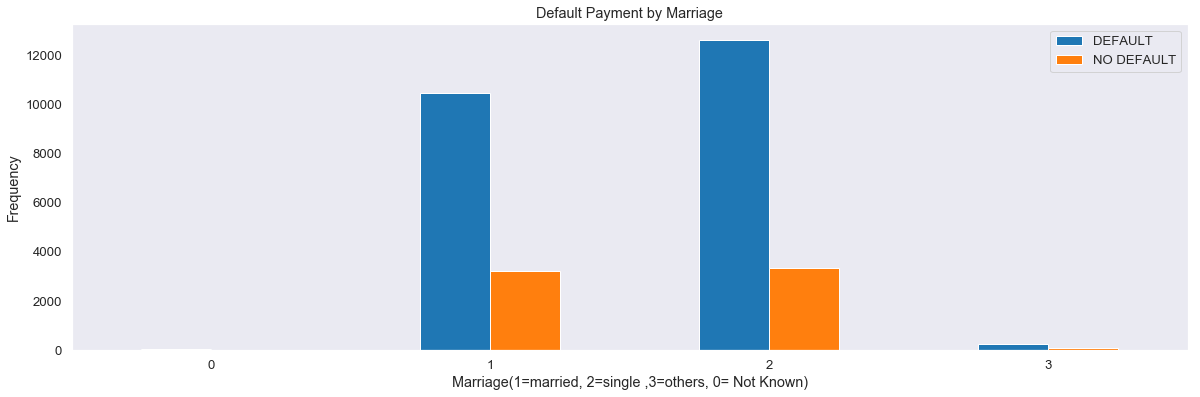

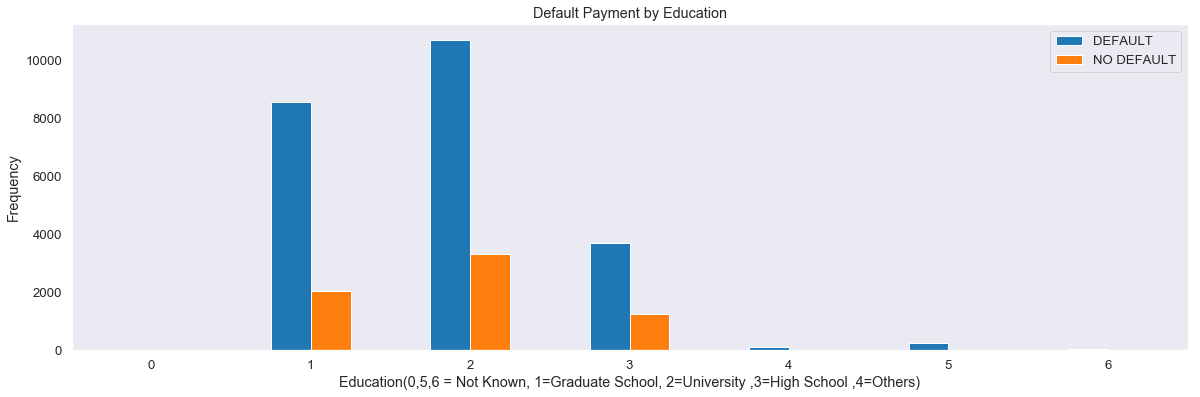

In [124]:
# Individual Plots on age, martial status and gender by target
sns.set_style("darkgrid")
pd.crosstab(data.GENDER,data.DEFAULT,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by Gender')
plt.xlabel('GENDER(1 = Male, 2 = Female)')
plt.legend(["Default", "No Default"])
plt.ylabel('Frequency')
plt.grid()
plt.show()

pd.crosstab(data.MARRIAGE,data.DEFAULT,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by Marriage')
plt.xlabel('Marriage(1=married, 2=single ,3=others, 0= Not Known)' )
plt.legend(["DEFAULT", "NO DEFAULT"])
plt.ylabel('Frequency')
plt.grid()
plt.show()

pd.crosstab(data.EDUCATION,data.DEFAULT,normalize=False).plot(kind="bar",rot=0,figsize=(20,6))
plt.title('Default Payment by Education')
plt.xlabel('Education(0,5,6 = Not Known, 1=Graduate School, 2=University ,3=High School ,4=Others)' )
plt.legend(["DEFAULT", "NO DEFAULT"])
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Continous variables

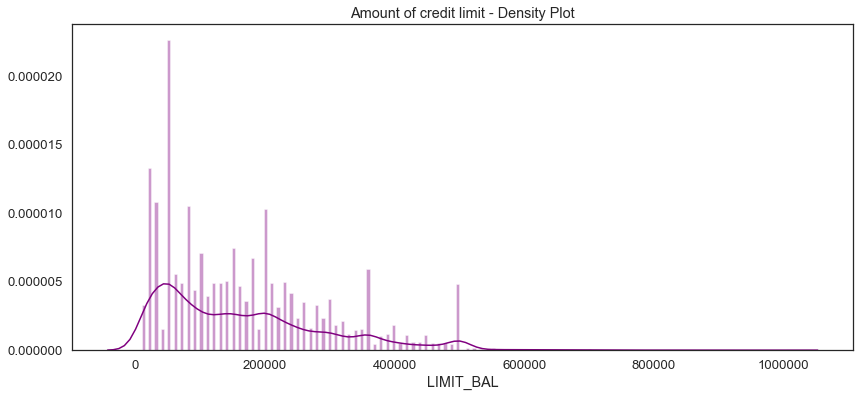

In [18]:
# Amount of credit line
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(Credit_Data['LIMIT_BAL'],kde=True,bins=200, color="purple")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K.

In [19]:
Credit_Data['LIMIT_BAL'].value_counts().shape

(81,)

There are 81 distinct values for amount of credit limit.

In [20]:
Credit_Data['LIMIT_BAL'].value_counts().head()

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

### Continous Variables by Target

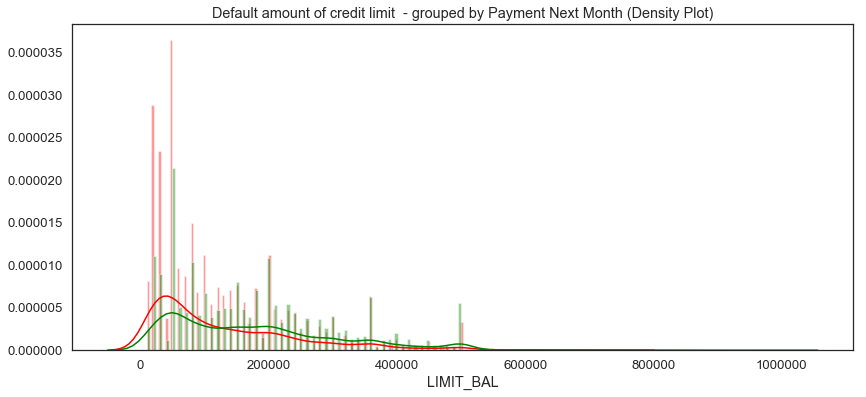

In [21]:
# Amount of credit limit grouped by target
class_0 = Credit_Data.loc[Credit_Data['DEFAULT'] == 0]["LIMIT_BAL"]
class_1 = Credit_Data.loc[Credit_Data['DEFAULT'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

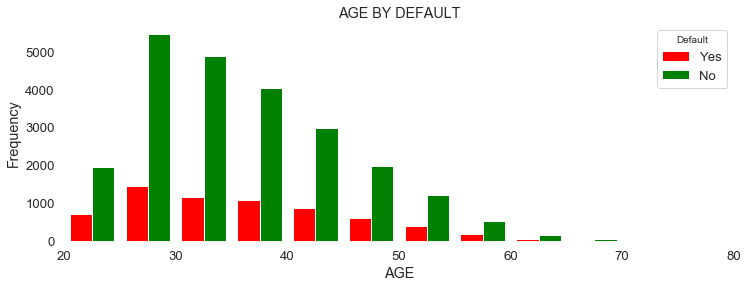

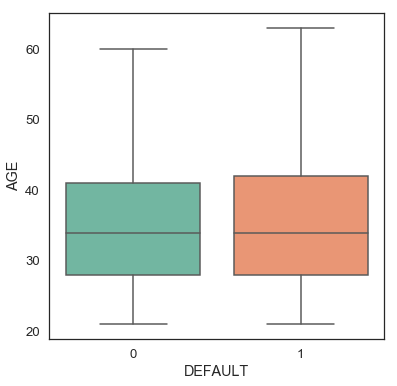

In [123]:
# AGE by target
# Count plot
x1 = list(Credit_Data[Credit_Data['DEFAULT'] == 1]['AGE'])
x2 = list(Credit_Data[Credit_Data['DEFAULT'] == 0]['AGE'])

plt.figure(figsize=(12,4))
#sns.set_context('notebook', font_scale=1.2)
sns.set_color_codes("pastel")
plt.hist([x1, x2], bins=[20,25, 30,35, 40,45, 50, 55, 60, 65, 70,75, 80], normed=False, color=['red', 'green'])
plt.xlim([20,80])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('AGE BY DEFAULT')
plt.box(False)
plt.show()

# Box plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,6))
s = sns.boxplot(ax = ax1, x="DEFAULT", y="AGE",data=Credit_Data, palette="Set2",showfliers=False)
plt.show();

- Our Data consist have a larger proportion of age in both default and non-default in 25-29 according to the histogram.
- There is not much difference in age for defaulting and non-defaulting according to the boxplot.

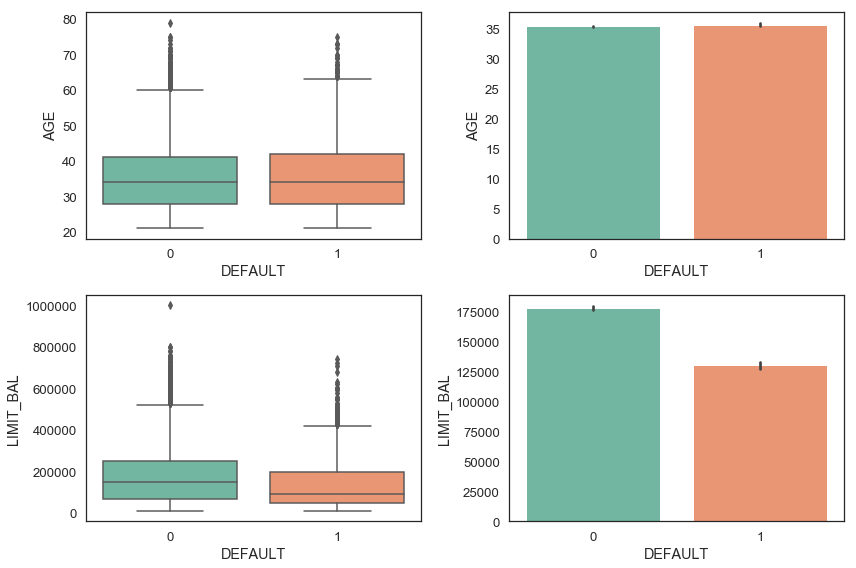

In [103]:
# Age and Limit Balance against target plot
fig, ax=plt.subplots(2,2,figsize=(12,8))
# Categorical vs Continuous ---- Default vs Gender
#boxplot
sns.boxplot(x="DEFAULT", y="AGE", data=Credit_Data,ax=ax[0][0], palette="Set2")

#barplot
sns.barplot(x="DEFAULT", y="AGE", data=Credit_Data,ax=ax[0][1], palette="Set2")


# Categorical vs Continuous ---- Default vs Limit_Bal
#boxplot
sns.boxplot(x="DEFAULT", y="LIMIT_BAL", data=Credit_Data, ax=ax[1][0], palette="Set2")


#barplot
sns.barplot(x="DEFAULT", y="LIMIT_BAL", data=Credit_Data,ax=ax[1][1], palette="Set2")

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

We observe that for age, there isn't any distinctive factor between the non-default and default. We do observe that in limit balance there is an high outliers of 1 million

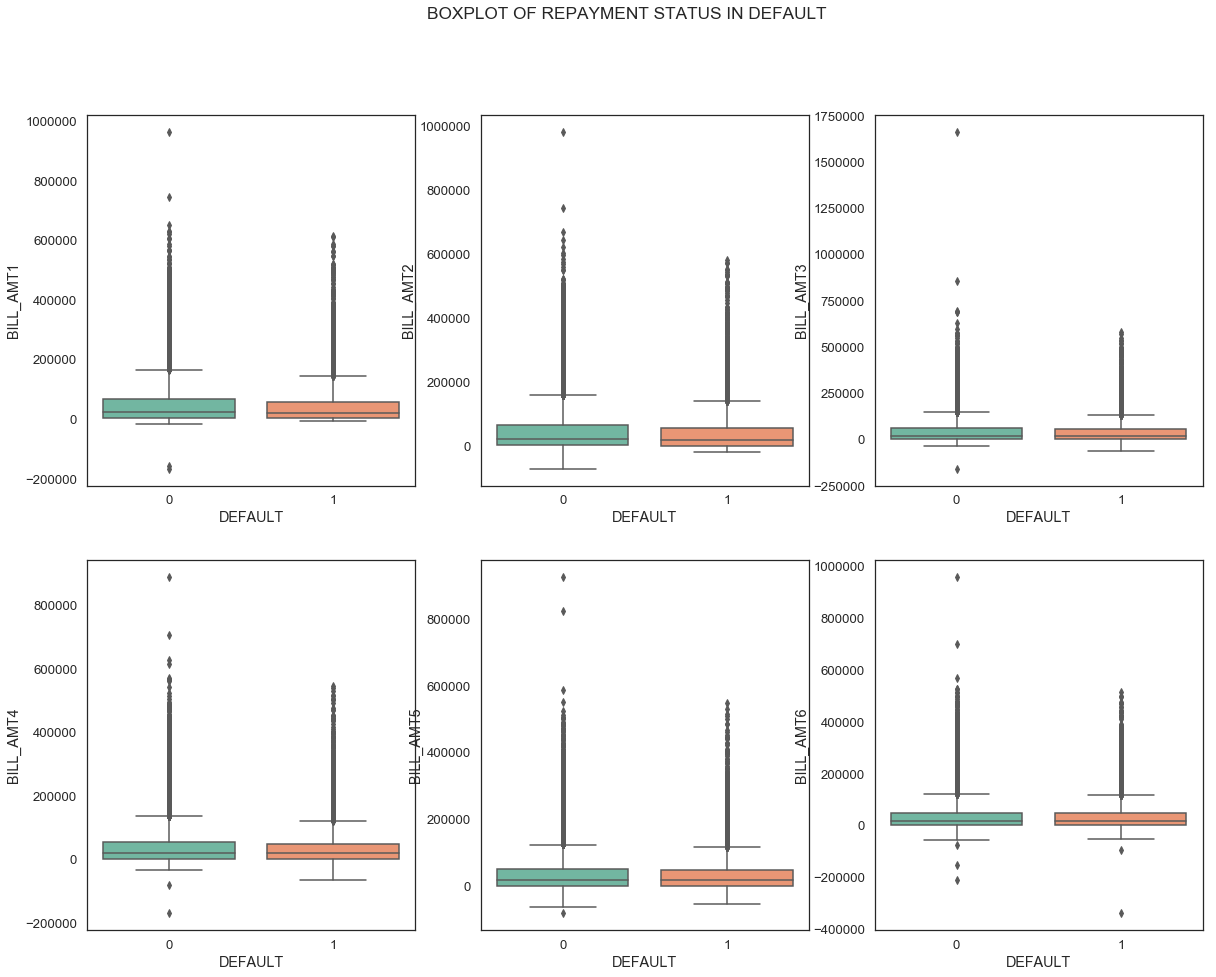

In [24]:
# Bill by target
sns.set_style(style='white')
# Box plot
fig, axes = plt.subplots(2, 3, figsize=(20,15))
fig.suptitle('BOXPLOT OF REPAYMENT STATUS IN DEFAULT')
ax1 = sns.boxplot(ax = axes[0,0], x="DEFAULT", y='BILL_AMT1',data=Credit_Data, palette="Set2",showfliers=True)
ax2 = sns.boxplot(ax = axes[0,1], x="DEFAULT", y='BILL_AMT2',data=Credit_Data, palette="Set2",showfliers=True)
ax3 = sns.boxplot(ax = axes[0,2], x="DEFAULT", y='BILL_AMT3',data=Credit_Data, palette="Set2",showfliers=True)
ax4 = sns.boxplot(ax = axes[1,0], x="DEFAULT", y='BILL_AMT4',data=Credit_Data, palette="Set2",showfliers=True)
ax5 = sns.boxplot(ax = axes[1,1], x="DEFAULT", y='BILL_AMT5',data=Credit_Data, palette="Set2",showfliers=True)
ax6 = sns.boxplot(ax = axes[1,2], x="DEFAULT", y='BILL_AMT6',data=Credit_Data, palette="Set2",showfliers=True)
plt.show();

There doesn't seems to have ay distinctive difference between the default and non-default in all the months

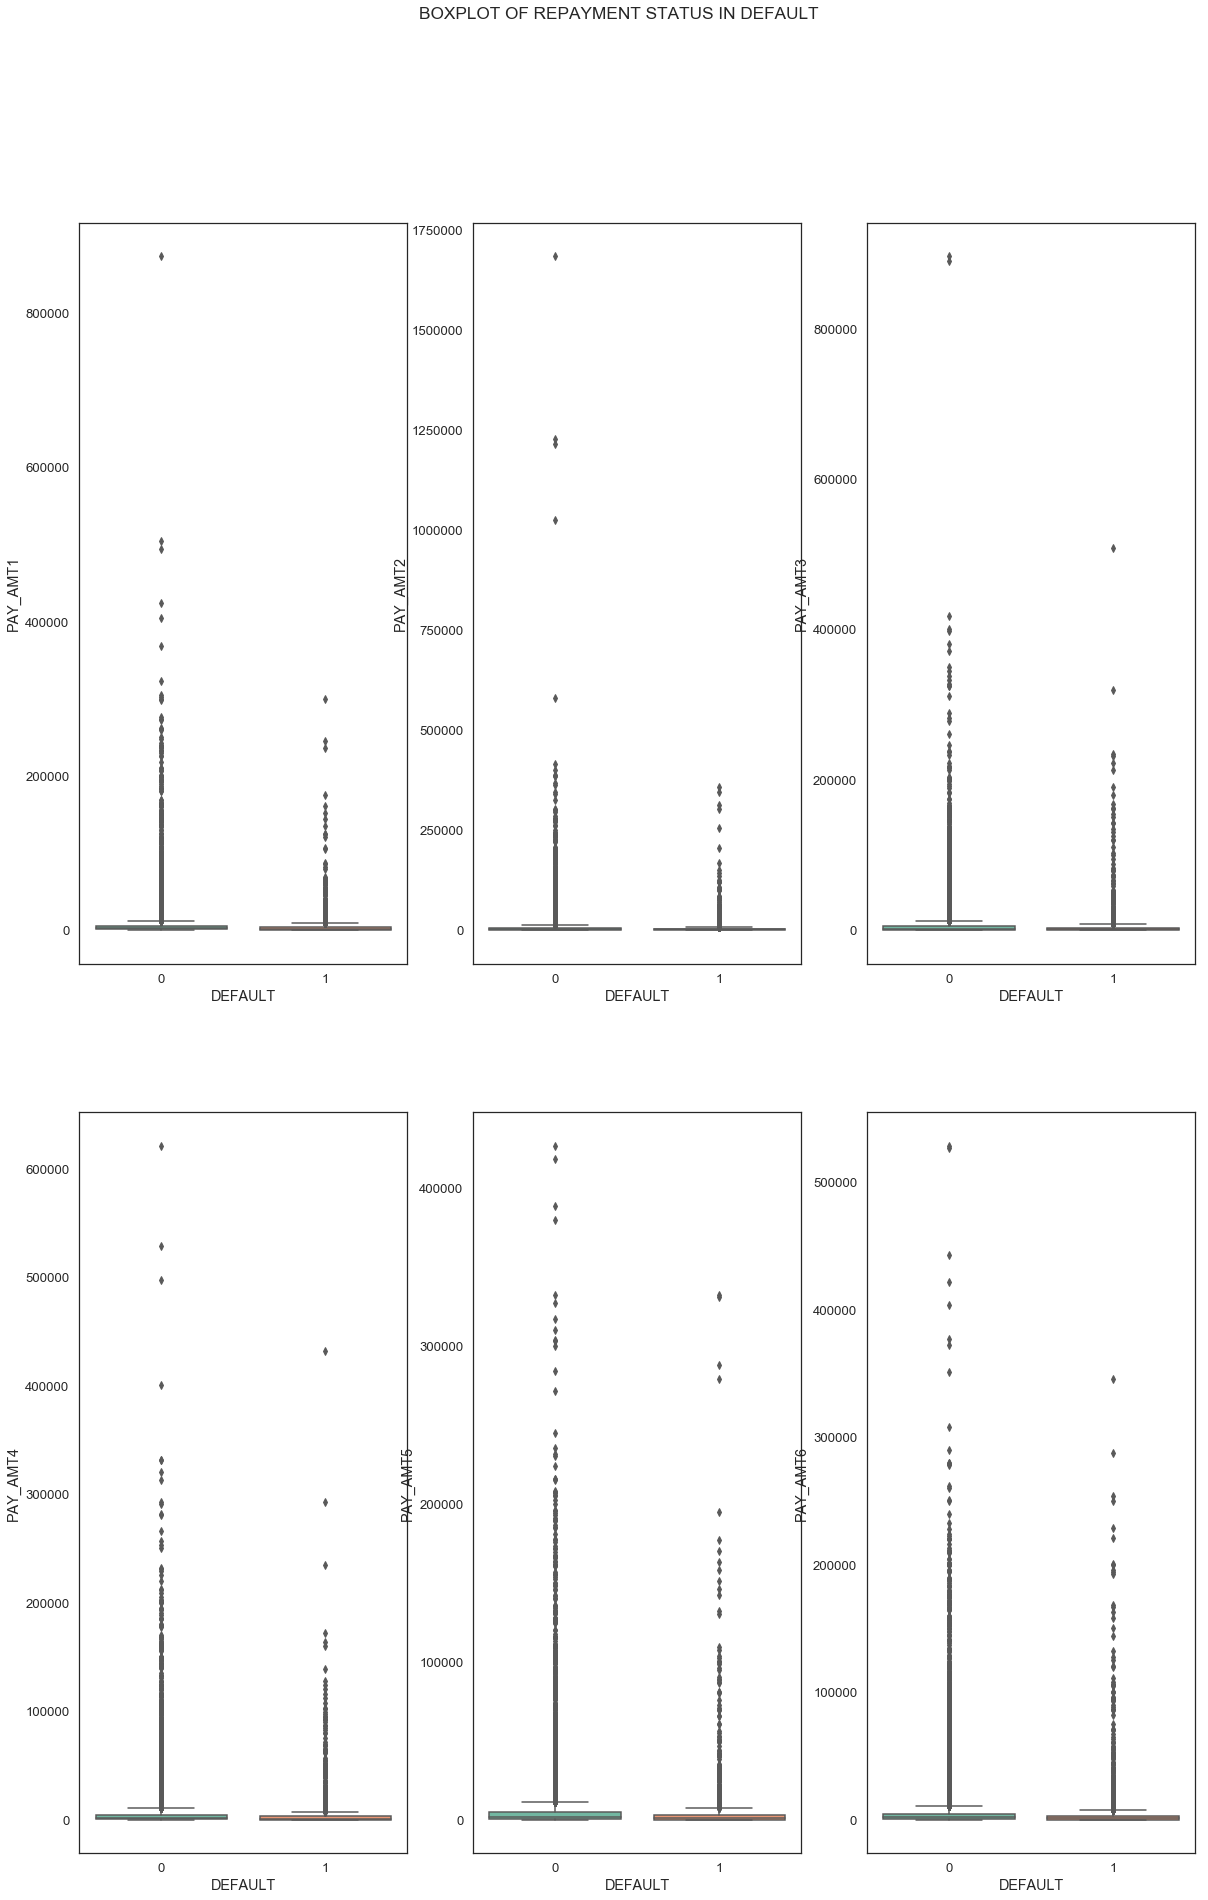

In [25]:
# Payment amount by target
# Box plot
fig, axes = plt.subplots(2, 3, figsize=(20,30))
fig.suptitle('BOXPLOT OF REPAYMENT STATUS IN DEFAULT')
ax1 = sns.boxplot(ax = axes[0,0], x="DEFAULT", y='PAY_AMT1',data=Credit_Data, palette="Set2",showfliers=True)
ax2 = sns.boxplot(ax = axes[0,1], x="DEFAULT", y='PAY_AMT2',data=Credit_Data, palette="Set2",showfliers=True)
ax3 = sns.boxplot(ax = axes[0,2], x="DEFAULT", y='PAY_AMT3',data=Credit_Data, palette="Set2",showfliers=True)
ax4 = sns.boxplot(ax = axes[1,0], x="DEFAULT", y='PAY_AMT4',data=Credit_Data, palette="Set2",showfliers=True)
ax5 = sns.boxplot(ax = axes[1,1], x="DEFAULT", y='PAY_AMT5',data=Credit_Data, palette="Set2",showfliers=True)
ax6 = sns.boxplot(ax = axes[1,2], x="DEFAULT", y='PAY_AMT6',data=Credit_Data, palette="Set2",showfliers=True)
plt.show();

There doesn't seems to have any distinct between default and non-default according to previous payment for all the months.
We do observe that there are a few extreme outliers in all the previous payment for all the months.

### Other explorations

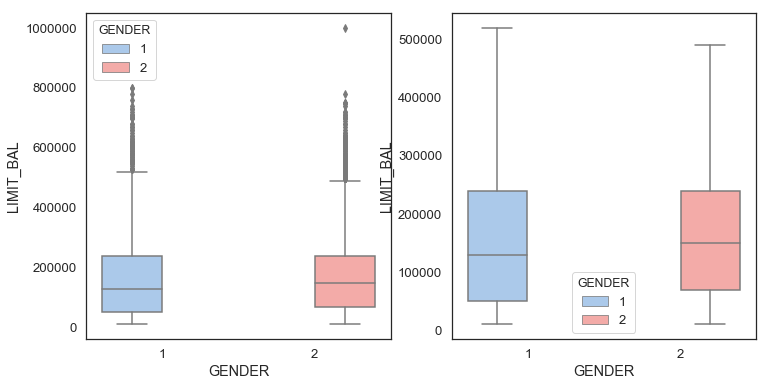

In [109]:
# Credit limit vs. sex
# For the sex, 1 stands for male and 2 for female.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="GENDER", y="LIMIT_BAL", hue="GENDER",data=Credit_Data, palette=['b','r'],showfliers=True)
s = sns.boxplot(ax = ax2, x="GENDER", y="LIMIT_BAL", hue="GENDER",data=Credit_Data, palette=['b','r'],showfliers=False)
plt.show();

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

In [111]:
# Function to create boxplot
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=Credit_Data, palette=['b','r','g','y'],showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

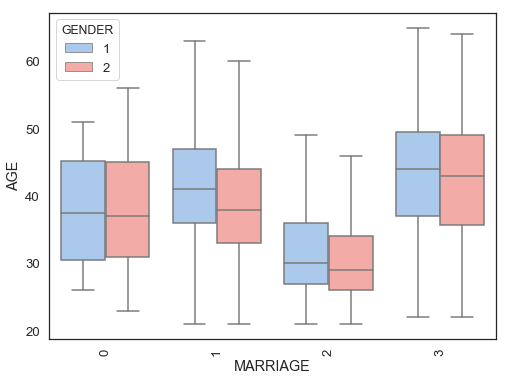

In [112]:
# Marriage, age , sex
boxplot_variation('MARRIAGE','AGE', 'GENDER',8)

It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.

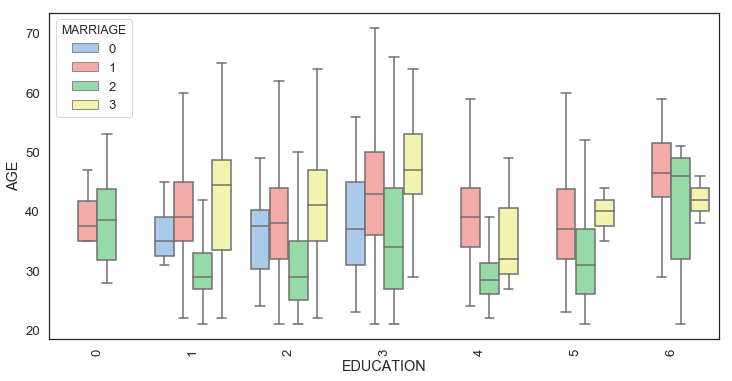

In [113]:
# Age, Sex and marriage
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

Education status meaning is:
0 : unknown
1 : graduate
2 : university
3 : high school
4 : others
5 : unknown
6 : unknown

Marriage status meaning is:
0 : unknown
1 : married
2 : single
3 : others

Age ranges widely for married students in high school.
Age generally are lower for single person in educational level of graduate, university and high school than that of a married person.

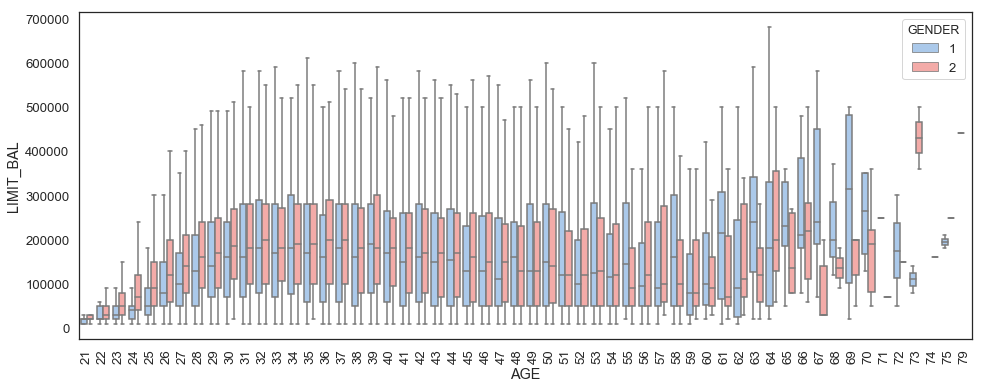

In [114]:
# boxplots with credit amount limit distribution grouped by age and sex.
boxplot_variation('AGE','LIMIT_BAL', 'GENDER',16)

1= Male and 2 = Female

Mean, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.

Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females.

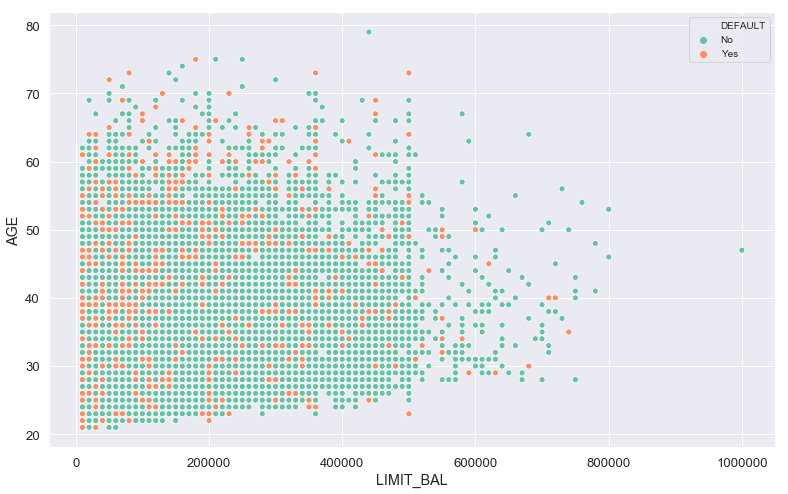

In [120]:
#Two numeric attributes vs class attribute
sns.set_style("darkgrid")
plt.figure(figsize=(13,8))
p=sns.scatterplot(x=Credit_Data['LIMIT_BAL'], y=Credit_Data['AGE'],hue=Credit_Data['DEFAULT'], palette = 'Set2')
current_handles, current_labels=p.get_legend_handles_labels()
p.legend(current_handles,['DEFAULT', 'No', 'Yes'],loc='upper right',prop={'size': 10})
plt.show()

We observe that more default is detected around the age from 30 to 5 at around 50K to 100K credit limit which are shown by more pink dots which are default payment cluttering around the area in the scatter plot.

### Feature Correlation

In [32]:
pd.DataFrame.corr(Credit_Data)

ID  LIMIT_BAL    GENDER  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.039177 -0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755  -0.219161 -0.108139  0.144713   
GENDER     0.018497   0.024755  1.000000   0.014232 -0.031389 -0.090874   
EDUCATION  0.039177  -0.219161  0.014232   1.000000 -0.143464  0.175061   
MARRIAGE  -0.029079  -0.108139 -0.031389  -0.143464  1.000000 -0.414170   
AGE        0.018678   0.144713 -0.090874   0.175061 -0.414170  1.000000   
PAY_1     -0.030575  -0.271214 -0.057643   0.105364  0.019917 -0.039447   
PAY_2     -0.011215  -0.296382 -0.070771   0.121566  0.024199 -0.050148   
PAY_3     -0.018494  -0.286123 -0.066096   0.114025  0.032688 -0.053048   
PAY_4     -0.002735  -0.267460 -0.060173   0.108793  0.033122 -0.049722   
PAY_5     -0.022199  -0.249411 -0.055064   0.097520  0.035629 -0.053826   
PAY_6     -0.020270  -0.235195 -0.044008   0.082316  0.034345 -0.048773   
BILL_AMT1  0.019389   0.285430 -0.033642   0.023581 -0.023472  0.056239   
BILL_AMT2  0.017982   0.278314 -0.031183   0.018749 -0.021602  0.054283   
BILL_AMT3  0.024354   0.283236 -0.024563   0.013002 -0.024909  0.053710   
BILL_AMT4  0.040351   0.293988 -0.021880  -0.000451 -0.023344  0.051353   
BILL_AMT5  0.016705   0.295562 -0.017005  -0.007567 -0.025393  0.049345   
BILL_AMT6  0.016730   0.290389 -0.016733  -0.009099 -0.021207  0.047613   
PAY_AMT1   0.009742   0.195236 -0.000242  -0.037456 -0.005979  0.026147   
PAY_AMT2   0.008406   0.178408 -0.001391  -0.030038 -0.008093  0.021785   
PAY_AMT3   0.039151   0.210167 -0.008597  -0.039943 -0.003541  0.029247   
PAY_AMT4   0.007793   0.203242 -0.002229  -0.038218 -0.012659  0.021379   
PAY_AMT5   0.000652   0.217202 -0.001667  -0.040358 -0.001205  0.022850   
PAY_AMT6   0.003000   0.219595 -0.002766  -0.037200 -0.006641  0.019478   
DEFAULT   -0.013952  -0.153520 -0.039961   0.028006 -0.024339  0.013890   

              PAY_1     PAY_2     PAY_3     PAY_4    ...     BILL_AMT4  \
ID        -0.030575 -0.011215 -0.018494 -0.002735    ...      0.040351   
LIMIT_BAL -0.271214 -0.296382 -0.286123 -0.267460    ...      0.293988   
GENDER    -0.057643 -0.070771 -0.066096 -0.060173    ...     -0.021880   
EDUCATION  0.105364  0.121566  0.114025  0.108793    ...     -0.000451   
MARRIAGE   0.019917  0.024199  0.032688  0.033122    ...     -0.023344   
AGE       -0.039447 -0.050148 -0.053048 -0.049722    ...      0.051353   
PAY_1      1.000000  0.672164  0.574245  0.538841    ...      0.179125   
PAY_2      0.672164  1.000000  0.766552  0.662067    ...      0.222237   
PAY_3      0.574245  0.766552  1.000000  0.777359    ...      0.227202   
PAY_4      0.538841  0.662067  0.777359  1.000000    ...      0.245917   
PAY_5      0.509426  0.622780  0.686775  0.819835    ...      0.271915   
PAY_6      0.474553  0.575501  0.632684  0.716449    ...      0.266356   
BILL_AMT1  0.187068  0.234887  0.208473  0.202812    ...      0.860272   
BILL_AMT2  0.189859  0.235257  0.237295  0.225816    ...      0.892482   
BILL_AMT3  0.179785  0.224146  0.227494  0.244983    ...      0.923969   
BILL_AMT4  0.179125  0.222237  0.227202  0.245917    ...      1.000000   
BILL_AMT5  0.180635  0.221348  0.225145  0.242902    ...      0.940134   
BILL_AMT6  0.176980  0.219403  0.222327  0.239154    ...      0.900941   
PAY_AMT1  -0.079269 -0.080701  0.001295 -0.009362    ...      0.233012   
PAY_AMT2  -0.070101 -0.058990 -0.066793 -0.001944    ...      0.207564   
PAY_AMT3  -0.070561 -0.055901 -0.053311 -0.069235    ...      0.300023   
PAY_AMT4  -0.064005 -0.046858 -0.046067 -0.043461    ...      0.130191   
PAY_AMT5  -0.058190 -0.037093 -0.035863 -0.033590    ...      0.160433   
PAY_AMT6  -0.058673 -0.036500 -0.035861 -0.026565    ...      0.177637   
DEFAULT    0.324794  0.263551  0.235253  0.216614    ...     -0.010156   

           BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
ID          0.016705   0.016730  0.009742  0.008406  0.039151  0.0

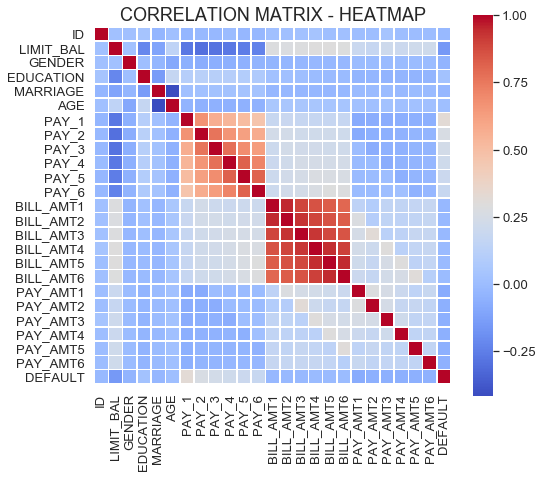

In [33]:
sns.set_style("white")
# By colours
#  Correlations matrix, defined via Pearson function  
corr = Credit_Data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

Text(0.5,1.05,'Pearson correlation of Features')

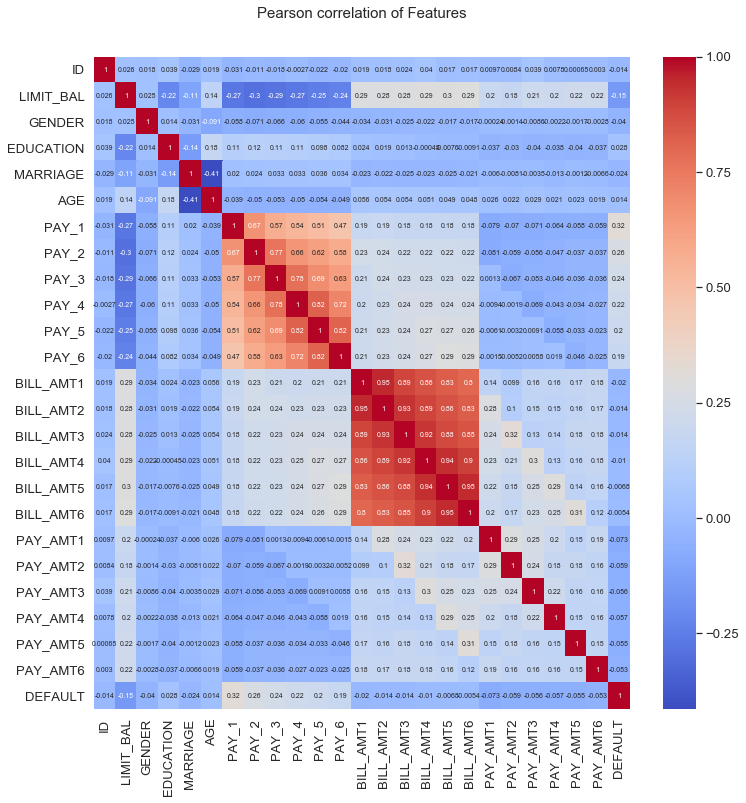

In [34]:
# Correlation Heatmap with annotation
corr = Credit_Data.corr()

f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr, ax=ax, annot=True, annot_kws={"size": 7}, cmap="coolwarm")

plt.title("Pearson correlation of Features", y=1.05, size=15)

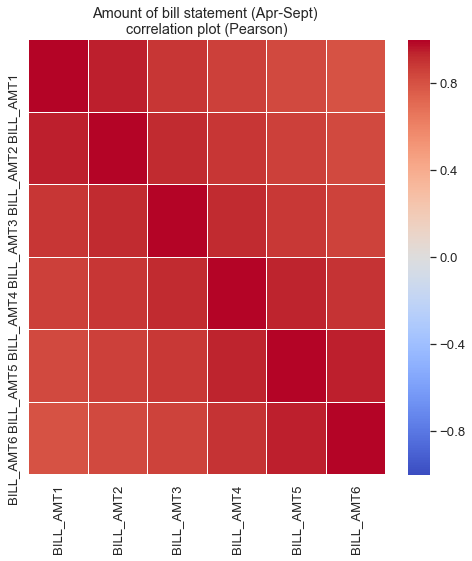

In [35]:
bill_var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = Credit_Data[bill_var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,cmap="coolwarm")
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April. 

Although there is quite a correlation, it is expected as the credit limit is the same and they might spend around the same amount in different months based on the spending behaviour on individual.

Let's check the correlation of Amount of previous payment in April - September 2005.

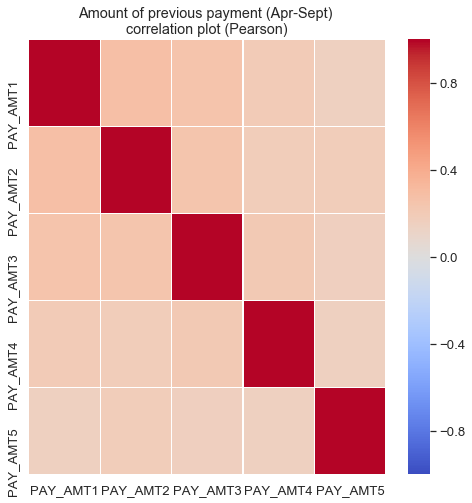

In [36]:
payamt_var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = Credit_Data[payamt_var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,cmap="coolwarm")
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.

Let's check the correlation between Repayment status in April - September 2005.

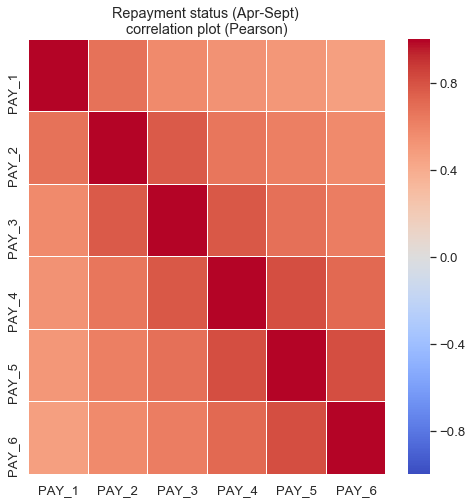

In [37]:
repay_var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = Credit_Data[repay_var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1,cmap="coolwarm")
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

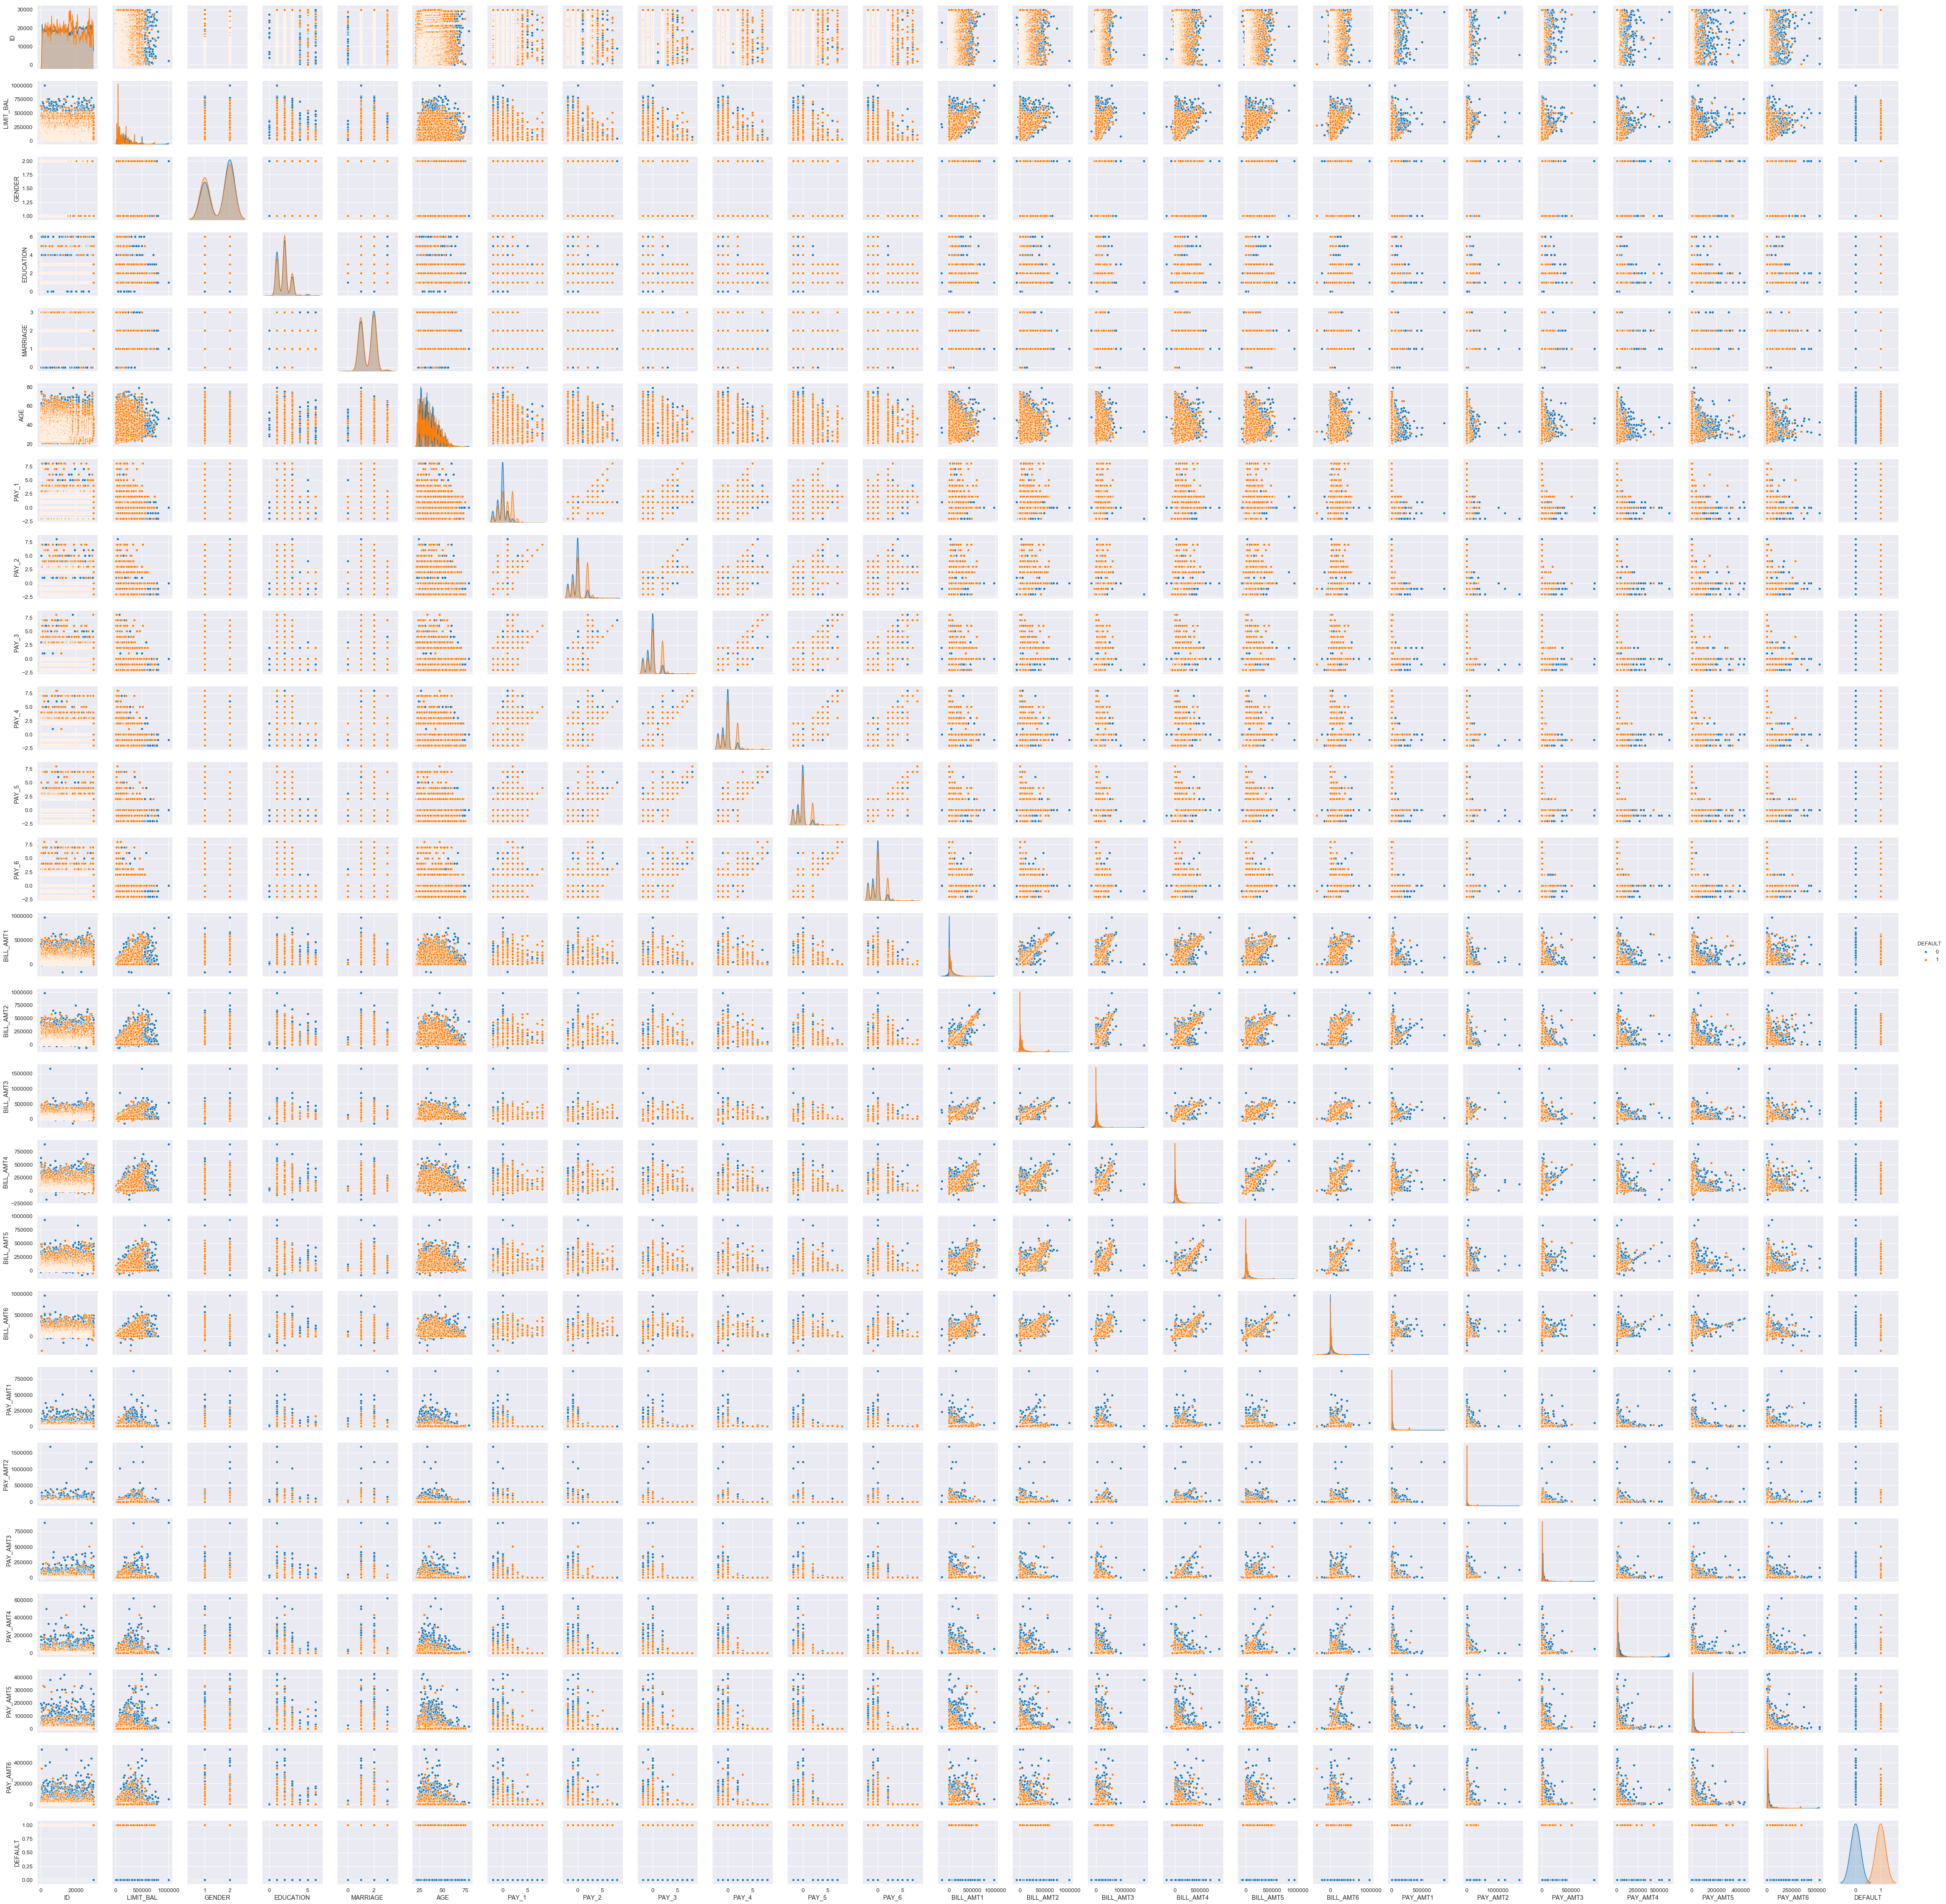

In [38]:
sns.pairplot(data,hue='DEFAULT',diag_kws={'bw': 0.2})

The above show the correlation of each variables pairwise

### Check Variation of features variables

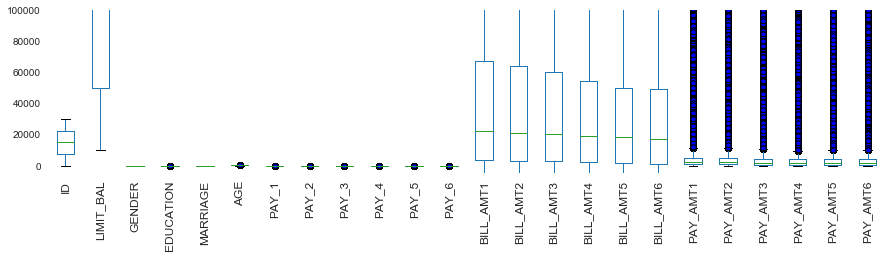

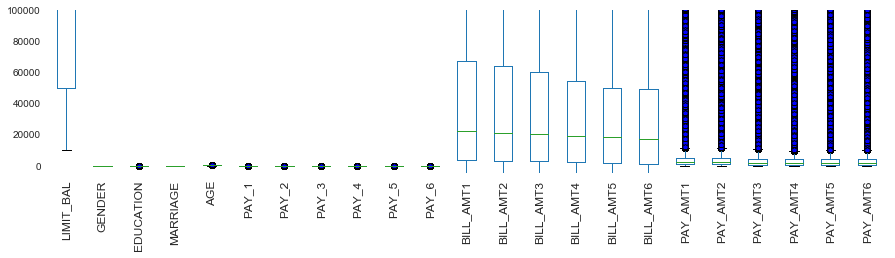

In [10]:
## data are distributed in a wide range (below), need to be normalizded.

# With ID
features = Credit_Data.drop('DEFAULT', axis = 1, inplace = False)
plt.figure(figsize=(15,3))
ax= Credit_Data.drop('DEFAULT', axis=1).boxplot(Credit_Data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.grid(False)
plt.box(False);

# Without ID
features = Credit_Data.drop(['ID','DEFAULT'], axis = 1, inplace = False)
plt.figure(figsize=(15,3))
ax= Credit_Data.drop(['ID','DEFAULT'], axis=1).boxplot(Credit_Data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.grid(False)
plt.box(False);

We observe that the feature variables variate alot of one another. Standardization is needed for most model.

## Data Cleaning

Drop ID and store variables for numberic and categorical data

In [9]:
data.index = data['ID']
data = data.drop(columns = ["ID"])
datacatcol=['GENDER','EDUCATION','MARRIAGE','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT']
numcol=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

We drop the ID column as we try the data with both ID and without ID, the performance of our models do not deviate much. Hence, we decide that ID is just a unique index. Moreover, from our dataset, it is order from 1 to 30000. This implies that ID has no relation and has not much effect on the target variable (default payment).

Below, we group education level of 0,5 and 6 as 0 and categorize them as unknown.

In [10]:
# Copied the data to A and worked on it.

A = data.copy(deep=True)

# For Education: Replace 5,6 as unknown (0)
A['EDUCATION']=np.where(A['EDUCATION'] == 5, 0, A['EDUCATION'])
A['EDUCATION']=np.where(A['EDUCATION'] == 6, 0, A['EDUCATION'])
print("Levels in education: ",A['EDUCATION'].unique())

# Category
A['DEFAULT']=A.DEFAULT.astype('category')
A['GENDER']=A.GENDER.astype('category')
A['MARRIAGE']=A.MARRIAGE.astype('category')
A['EDUCATION']=A.EDUCATION.astype('category')
A['PAY_1']=A.PAY_1.astype('category')
A['PAY_2']=A.PAY_2.astype('category')
A['PAY_3']=A.PAY_3.astype('category')
A['PAY_4']=A.PAY_4.astype('category')
A['PAY_5']=A.PAY_5.astype('category')
A['PAY_6']=A.PAY_6.astype('category')

print(A.dtypes)

Levels in education:  [2 1 3 0 4]
LIMIT_BAL       int64
GENDER       category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_1        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
DEFAULT      category
dtype: object


In [45]:
A

LIMIT_BAL GENDER EDUCATION MARRIAGE  AGE PAY_1 PAY_2 PAY_3 PAY_4 PAY_5  \
ID                                                                              
1          20000      2         2        1   24     2     2    -1    -1    -2   
2         120000      2         2        2   26    -1     2     0     0     0   
3          90000      2         2        2   34     0     0     0     0     0   
4          50000      2         2        1   37     0     0     0     0     0   
5          50000      1         2        1   57    -1     0    -1     0     0   
6          50000      1         1        2   37     0     0     0     0     0   
7         500000      1         1        2   29     0     0     0     0     0   
8         100000      2         2        2   23     0    -1    -1     0     0   
9         140000      2         3        1   28     0     0     2     0     0   
10         20000      1         3        2   35    -2    -2    -2    -2    -1   
11        200000      2         3        2   34     0     0     2     0     0   
12        260000      2         1        2   51    -1    -1    -1    -1    -1   
13        630000      2         2        2   41    -1     0    -1    -1    -1   
14         70000      1         2        2   30     1     2     2     0     0   
15        250000      1         1        2   29     0     0     0     0     0   
16         50000      2         3        3   23     1     2     0     0     0   
17         20000      1         1        2   24     0     0     2     2     2   
18        320000      1         1        1   49     0     0     0    -1    -1   
19        360000      2         1        1   49     1    -2    -2    -2    -2   
20        180000      2         1        2   29     1    -2    -2    -2    -2   
21        130000      2         3        2   39     0     0     0     0     0   
22        120000      2         2        1   39    -1    -1    -1    -1    -1   
23         70000      2         2        2   26     2     0     0     2     2   
24        450000      2         1        1   40    -2    -2    -2    -2    -2   
25         90000      1         1        2   23     0     0     0    -1     0   
26         50000      1         3        2   23     0     0     0     0     0   
27         60000      1         1        2   27     1    -2    -1    -1    -1   
28         50000      2         3        2   30     0     0     0     0     0   
29         50000      2         3        1   47    -1    -1    -1    -1    -1   
30         50000      1         1        2   26     0     0     0     0     0   
...          ...    ...       ...      ...  ...   ...   ...   ...   ...   ...   
29971     360000      1         1        1   34    -1    -1    -1     0     0   
29972      80000      1         3        1   36     0     0     0     0     0   
29973     190000      1         1        1   37     0     0     0     0     0   
29974     230000      1         2        1   35     1    -2    -2    -2    -2   
29975      50000      1         2        1   37     1     2     2     2     0   
29976     220000      1         2        1   41     0     0    -1    -1    -2   
29977      40000      1         2        2   47     2     2     3     2     2   
29978     420000      1         1        2   34     0     0     0     0     0   
29979     310000      1         2        1   39     0     0     0     0     0   
29980     180000      1         1        1   32    -2    -2    -2    -2    -2   
29981      50000      1         3        2   42     0     0     0     0     0   
29982      50000      1         2        1   44     1     2     2     2     0   
29983      90000      1         2        1   36     0     0     0     0     0   
29984      20000      1         2        1   44    -2    -2    -2    -2    -2   
29985      30000      1         2        2   38    -1    -1    -2    -1    -1   
29986     240000      1         1        2   30    -2    -2    -2    -2    -2   
29987     360000      1         1     

## Model Building

Preparation for evaluting data:

- Define a function to print confusion matrix called CMatrix
- Storing of performance into a dataframe for each model called metrics

In [11]:
#Function to print a confusion matrix
def CMatrix(CM, labels = ['NO DEFAULT', 'DEFAULT']):
    df = pd.DataFrame(data = CM, index = labels, columns = labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df. sum(axis = 1)
    return df

In [12]:
# Dataframe of confusion matrix
metrics = pd.DataFrame (index = ['accuracy','precision','recall'], 
                        columns = ['Logistic Regression','Decision Trees','Decision Trees with CV', 'Pruned Decision Trees', 'Random Forest' ,'Random Forest with CV' , 'ADABoost' , 'SVM', 'SVM with CV','NaiveBayes'])

### A. Logistic Regression


Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The sigmoid function is a function that resembles an “S” shaped curve when plotted on a graph. It takes values between 0 and 1 and “squishes” them towards the margins at the top and bottom, labeling them as 0 or 1. Since our target variable default payment is a binary variable, logistic regression would be a good approach for our dataset. 

For logistic regression, we will do the following Datapreprocessing: 

- Spliting the data into train and test data with 70% and 30% Respectively. 
- Further divide the the train and test data to feature variables and target variable
- Scale the numberic data of the train data using RobustScaler()
- Use the median and interquartile range of the scaling of numberic train date to scale the test data
- Do oversampling using SMOTE

Using TensorFlow backend.


PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        4898     2102   7000
DEFAULT            712     1288   2000
Total             5610     3390   9000

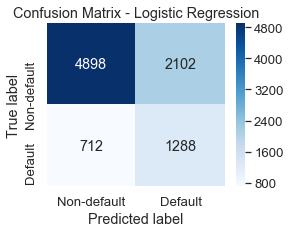

In [48]:
#Processing the data first

lrdata = A.copy(deep=True)

#Splitting the data into Train and test
seed = 1
lr_train, lr_test = train_test_split(lrdata, train_size = 0.7, random_state = seed)
lr_train.reset_index(inplace = True, drop = True)
lr_test.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_lr_train = lr_train["DEFAULT"]
x_lr_train = lr_train.loc[:,lr_train.columns!='DEFAULT']

y_lr_test = lr_test["DEFAULT"]
x_lr_test = lr_test.loc[:,lr_test.columns!='DEFAULT']

# Standardization of a dataset is a common requirement for many machine learning estimators. 
# Typically this is done by removing the mean and scaling to unit variance. 
# However, outliers can often influence the sample mean / variance in a negative way. 
# In such cases, the median and the interquartile range often give better results.

# Scaling the data
sc = RobustScaler().fit(x_lr_train[numcol])
x_lr_train[numcol] = sc.transform(x_lr_train[numcol])
x_lr_test[numcol] = sc.transform(x_lr_test[numcol])

columns=x_lr_train.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
lr_X,lr_y=Ov_sampling.fit_sample(x_lr_train,y_lr_train)
lr_X=pd.DataFrame(data=lr_X,columns=columns)
lr_y=pd.DataFrame(lr_y,columns=['DEFAULT'])

#Fitting the model
logistic_regression = LogisticRegression(n_jobs = -1, random_state = seed)
logistic_regression.fit(lr_X, lr_y)

#Evaluate the model
y_pred_test = logistic_regression.predict(x_lr_test)
metrics.loc['accuracy','Logistic Regression'] = accuracy_score(y_pred = y_pred_test, y_true = y_lr_test)
metrics.loc['precision','Logistic Regression'] = precision_score(y_pred = y_pred_test, y_true = y_lr_test)
metrics.loc['recall','Logistic Regression'] = recall_score(y_pred = y_pred_test, y_true = y_lr_test)

#Confusion matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_test, y_true = y_lr_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_lr_test)
CMatrix(CM)


In [49]:
print('Accuracy Rate:', accuracy_score(y_pred = y_pred_test, y_true = y_lr_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_test, y_true = y_lr_test))
print('Precision Score:', precision_score(y_pred = y_pred_test, y_true = y_lr_test))
print('Recall Score:', recall_score(y_pred = y_pred_test, y_true = y_lr_test))
print()
print(classification_report(y_lr_test, y_pred_test))

Accuracy Rate: 0.6873333333333334
Misclassification Rate: 0.31266666666666665
Precision Score: 0.3799410029498525
Recall Score: 0.644

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      7000
           1       0.38      0.64      0.48      2000

   micro avg       0.69      0.69      0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.76      0.69      0.71      9000



**Advantages of Logistic Regression**

1. Logistic Regression performs well when the dataset is linearly separable.

2. Logistic regression is less prone to over-fitting but it can overfit in high dimensional datasets. 

3. Logistic Regression not only gives a measure of how relevant a predictor (coefficient size) is, but also its direction of association (positive or negative).

4. Logistic regression is easier to implement, interpret and very efficient to train. 

**Disadvantages of Logistic Regression**

1. Main limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. Most of the time data would be a jumbled mess.

2. If the number of observations are lesser than the number of features, Logistic Regression should not be used, otherwise it may lead to overfit.

3. Logistic Regression can only be used to predict discrete functions. Therefore, the dependent variable of Logistic Regression is restricted to the discrete number set. This restriction itself is problematic, as it is prohibitive to the prediction of continuous data.

**Result**

According to our accuracy of 68.7%, we are doing moderately good in terms of accuracy rate.
Although we have a high recall of 64.4%, we are having a low precision of 37.99%.

Percision: 
- Out of all the predicted default, only 37.99% of them are correctly identified as default.

Recall:
- Out of True default, 64.4% of them are correctly identified as default.

### B. Decision (Classification) Trees

Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced. Hence, oversampled are required in training dataset.

### 1. Decision Tree

Data Preprocessing:
- No standardizing is required for decision tree.
- However, due to the imbalance data set, we should oversample our training data.
- Oversample the trainning data using SMOTE

Using TensorFlow backend.


Variables actually used in tree construction:
 ['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Misclassification error rate: 0.20655555555555555 = 1859/9000


PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        6233      767   7000
DEFAULT           1092      908   2000
Total             7325     1675   9000

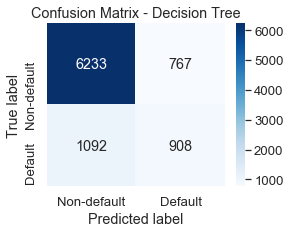

In [13]:
#Standardisation, preprocessing not required for decision tree.
#But oversampling is required

cldata = A.copy(deep=True)

#Splitting the data into Train and test
seed = 1
cl_train, cl_test = train_test_split(cldata, train_size = 0.7, random_state = seed)
cl_train.reset_index(inplace = True, drop = True)
cl_test.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_cl_train = cl_train["DEFAULT"]
x_cl_train = cl_train.loc[:,cl_train.columns!='DEFAULT']

y_cl_test = cl_test["DEFAULT"]
x_cl_test = cl_test.loc[:,cl_test.columns!='DEFAULT']

columns=x_cl_train.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling_cl=SMOTE(random_state=100)
cl_X,cl_y=Ov_sampling_cl.fit_sample(x_cl_train,y_cl_train)
cl_X=pd.DataFrame(data=cl_X,columns=columns)
cl_y=pd.DataFrame(cl_y,columns=['DEFAULT'])

#Fitting the model
class_tree = DecisionTreeClassifier(random_state = seed,min_samples_split = 600, min_samples_leaf = 10, criterion = 'gini')

# Train the model
class_tree.fit(cl_X, cl_y)

#Evaluate the model
y_pred_test_cl = class_tree.predict(x_cl_test)
metrics.loc['accuracy','Decision Trees'] = accuracy_score(y_pred = y_pred_test_cl, y_true = y_cl_test)
metrics.loc['precision','Decision Trees'] = precision_score(y_pred = y_pred_test_cl, y_true = y_cl_test)
metrics.loc['recall','Decision Trees'] = recall_score(y_pred = y_pred_test_cl, y_true = y_cl_test)

features = cl_X.columns
feature_importance = class_tree.feature_importances_
print("Variables actually used in tree construction:\n", list(features[feature_importance != 0]))
print("Misclassification error rate: %s = %s/%s" %((y_pred_test_cl != y_cl_test).sum()/len(y_cl_test), (y_pred_test_cl != y_cl_test).sum(), len(y_cl_test)))

#Confusion matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_test_cl, y_true = y_cl_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

CM = confusion_matrix(y_pred = y_pred_test_cl, y_true = y_cl_test)
CMatrix(CM)

In [14]:
print('Accuracy Rate:', accuracy_score(y_pred = y_pred_test_cl, y_true = y_cl_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_test_cl, y_true = y_cl_test))
print('Precision Score:', precision_score(y_pred = y_pred_test_cl, y_true = y_cl_test))
print('Recall Score:', recall_score(y_pred = y_pred_test_cl, y_true = y_cl_test))
print()
print(classification_report(y_cl_test, y_pred_test_cl))

Accuracy Rate: 0.7934444444444444
Misclassification Rate: 0.2065555555555556
Precision Score: 0.542089552238806
Recall Score: 0.454

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7000
           1       0.54      0.45      0.49      2000

   micro avg       0.79      0.79      0.79      9000
   macro avg       0.70      0.67      0.68      9000
weighted avg       0.78      0.79      0.79      9000



In [15]:
print('Performance on Training data using DT: ',class_tree.score(cl_X, cl_y))

Performance on Training data using DT:  0.8424590564654119


**Result**

According to our accuracy of 79.34%, we are doing quite well in terms of accuracy rate.
We have quite a balance score for both precision and score of 54.2% and 45.4% respectively.

Percision: 
- Out of all the predicted default, only 54.2% of them are correctly identified as default.

Recall:
- Out of True default, 45.4% of them are correctly identified as default.

**Advantages**:
- Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
- A decision tree does not require normalization of data.
- A decision tree does not require scaling of data as well.
- Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
- A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

**Disadvantage**:
- A small change in the data can cause a large change in the structure of the decision tree causing instability.
- For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
- Decision tree often involves higher time to train the model.
- Decision tree training is relatively expensive as the complexity and time taken are more.
- Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

### 1.1 Tuned Decision Tree with 5-fold CV

In [53]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
              "max_features": [1,2,3,4,5,6,7,8,9,10,11,12],
              "min_samples_leaf": [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,100],
              "min_samples_split":[100,200,300,400,500,600,700,800,900,1000],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv with 5-fold cross-validation
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(cl_X, cl_y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 100, 'min_samples_leaf': 30, 'max_features': 10, 'max_depth': 8, 'criterion': 'entropy'}


#### Decision tree with Tuned parameters

Average 5-Fold CV Score: 0.8165 , Standard deviation: 0.092
Variables actually used in tree construction:
 ['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Misclassification error rate: 0.19966666666666666 = 1859/9000


PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        6325      675   7000
DEFAULT           1122      878   2000
Total             7447     1553   9000

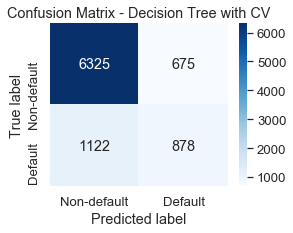

In [54]:
# Fitting the model
Tree_tuned = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, 
                                     max_features= 12  , min_samples_leaf= 40, min_samples_split = 700,
                                     random_state=seed)
## 5-fold cross-validation 
cv_scores =cross_val_score(Tree_tuned, cl_X, cl_y, cv=5)

# Print the 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

# Train the model
Tree_tuned.fit(cl_X, cl_y)

# Predict
y_pred_tuned_cl = Tree_tuned.predict(x_cl_test)

#Evaluate the model
metrics.loc['accuracy','Decision Trees with CV'] = accuracy_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test)
metrics.loc['precision','Decision Trees with CV'] = precision_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test)
metrics.loc['recall','Decision Trees with CV'] = recall_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test)

features = cl_X.columns
feature_importance = class_tree.feature_importances_
print("Variables actually used in tree construction:\n", list(features[feature_importance != 0]))
print("Misclassification error rate: %s = %s/%s" %((y_pred_tuned_cl != y_cl_test).sum()/len(y_cl_test), (y_pred_test_cl != y_cl_test).sum(), len(y_cl_test)))

#Confusion matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_cl_test,Tree_tuned.predict(x_cl_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree with CV");

CM = confusion_matrix(y_pred = y_pred_tuned_cl, y_true = y_cl_test)
CMatrix(CM)

In [55]:
metrics.loc['accuracy','Decision Trees with CV'] = accuracy_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test)
metrics.loc['precision','Decision Trees with CV'] = precision_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test)
metrics.loc['recall','Decision Trees with CV'] = recall_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test)

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test))
print('Precision Score:', precision_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test))
print('Recall Score:', recall_score(y_pred = y_pred_tuned_cl, y_true = y_cl_test))

print()
print(classification_report(y_pred = y_pred_tuned_cl, y_true = y_cl_test))

Accuracy Rate: 0.8003333333333333
Misclassification Rate: 0.19966666666666666
Precision Score: 0.5653573728267869
Recall Score: 0.439

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      7000
           1       0.57      0.44      0.49      2000

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.71      0.67      0.68      9000
weighted avg       0.79      0.80      0.79      9000



**Result**

According to our accuracy of 80%, we are doing well in terms of accuracy rate.
We have quite a balance score for both precision and score of 56.5% and 43.9% respectively.

Percision: 
- Out of all the predicted default, only 56.5% of them are correctly identified as default.

Recall:
- Out of True default, 43.9% of them are correctly identified as default.

**Comment**

After doing cross validation on tuning parameters, the accuracy of the model has slightly increase from 79.34% to 80.03%. The precision had slightly increase from 54.21% to 45.4% while the recall had slightly decrease from 45.4% to 43.9%. Hence, i would say that for decision tree, with CV and without CV doesn't have much have a difference in term of performance.

 ### 2. Prune decision tree

PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        6221      779   7000
DEFAULT           1083      917   2000
Total             7304     1696   9000

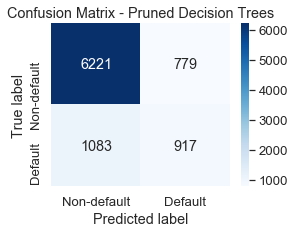

In [56]:
prune_tree_class = DecisionTreeClassifier( criterion= 'gini',
                                     max_features= 20  , min_samples_leaf= 20, min_samples_split = 600,
                                     random_state=seed)
prune_tree_class.fit(cl_X, cl_y)
y_pred_prune = prune_tree_class.predict(x_cl_test)

#Evaluate the model
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_prune, y_true = y_cl_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Pruned Decision Trees");

CM = confusion_matrix(y_pred = y_pred_prune, y_true = y_cl_test)
metrics.loc['accuracy','Pruned Decision Trees'] = accuracy_score(y_pred = y_pred_prune, y_true = y_cl_test)
metrics.loc['precision','Pruned Decision Trees'] = precision_score(y_pred = y_pred_prune, y_true = y_cl_test)
metrics.loc['recall','Pruned Decision Trees'] = recall_score(y_pred = y_pred_prune, y_true = y_cl_test)
CMatrix(CM)

In [57]:
print('Accuracy Rate:', accuracy_score(y_pred = y_pred_prune, y_true = y_cl_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_prune, y_true = y_cl_test))
print('Precision Score:', precision_score(y_pred = y_pred_prune, y_true = y_cl_test))
print('Recall Score:', recall_score(y_pred = y_pred_prune, y_true = y_cl_test))
print()
print(classification_report(y_cl_test, y_pred_prune))

Accuracy Rate: 0.7931111111111111
Misclassification Rate: 0.2068888888888889
Precision Score: 0.5406839622641509
Recall Score: 0.4585

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      7000
           1       0.54      0.46      0.50      2000

   micro avg       0.79      0.79      0.79      9000
   macro avg       0.70      0.67      0.68      9000
weighted avg       0.78      0.79      0.79      9000



**Good**

Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances.

As the name implies, pruning involves cutting back the tree. After a tree has been built, it may be overfitted. 

**Result**

According to our accuracy of 79.3%, we are doing quite well in terms of accuracy rate.
We have quite a balance score for both precision and score of 54.06% and 45.85% respectively.

Percision: 
- Out of all the predicted default, only 54.06% of them are correctly identified as default.

Recall:
- Out of True default, 45.85% of them are correctly identified as default.

### 3. Random Forest

OOB estimate of  error rate: 11.42%
Confusion matrix


PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        6502      498   7000
DEFAULT           1207      793   2000
Total             7709     1291   9000

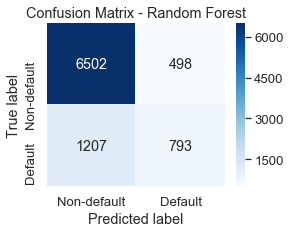

In [58]:
rf_class = RandomForestClassifier(max_features = "sqrt", n_estimators = 1500, random_state = seed, oob_score = True)

#Fit the model
rf_class.fit(cl_X, cl_y)

#Predict the model
y_pred_rf = rf_class.predict(x_cl_test)

#Evaluate the model
print("OOB estimate of  error rate: {:.2%}".format(1-rf_class.oob_score_))
print("Confusion matrix")
confusion_matrix(y_cl_test, y_pred_rf)

# Evaluate the model
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_rf, y_true = y_cl_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

CM = confusion_matrix(y_pred = y_pred_rf, y_true = y_cl_test)
metrics.loc['accuracy','Random Forest'] = accuracy_score(y_pred = y_pred_rf, y_true = y_cl_test)
metrics.loc['precision','Random Forest'] = precision_score(y_pred = y_pred_rf, y_true = y_cl_test)
metrics.loc['recall','Random Forest'] = recall_score(y_pred = y_pred_rf, y_true = y_cl_test)
CMatrix(CM)

Text(0.5,0,'Gini importance')

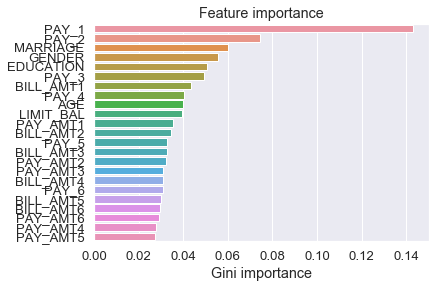

In [59]:
#Feature Importance
features = cl_X.columns
importances = rf_class.feature_importances_
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("Feature importance")
plt.xlabel("Gini importance")
# feature importance of each feature for each class , MeanDecreaseAccuracy MeanDecreaseGini 

In [60]:
print('Accuracy Rate:', accuracy_score(y_pred = y_pred_rf, y_true = y_cl_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_rf, y_true = y_cl_test))
print('Precision Score:', precision_score(y_pred = y_pred_rf, y_true = y_cl_test))
print('Recall Score:', recall_score(y_pred = y_pred_rf, y_true = y_cl_test))
print()
print(classification_report(y_cl_test, y_pred_rf))

Accuracy Rate: 0.8105555555555556
Misclassification Rate: 0.18944444444444442
Precision Score: 0.6142525174283501
Recall Score: 0.3965

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7000
           1       0.61      0.40      0.48      2000

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.73      0.66      0.68      9000
weighted avg       0.79      0.81      0.79      9000



**Result**

According to our accuracy of 81.06%, we are doing quite well in terms of accuracy rate.
Although we have a high precision score of 61.4%, we have a low recall score of 39.65%.

Percision: 
- Out of all the predicted default, only 61.4% of them are correctly identified as default.

Recall:
- Out of True default, 39.65% of them are correctly identified as default.

### 3.1 Tuned Random Forest with 5-fold CV

In [61]:
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18],
               'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0)

rf_cv.fit(cl_X, cl_y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 3, 'max_depth': 15, 'criterion': 'entropy'}


#### Random Forest with tuned parameters

Average 5-Fold CV Score: 0.8621 , Standard deviation: 0.121
Variables actually used in tree construction:
 ['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Misclassification error rate: 0.18433333333333332 = 1659/9000


PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        6580      420   7000
DEFAULT           1239      761   2000
Total             7819     1181   9000

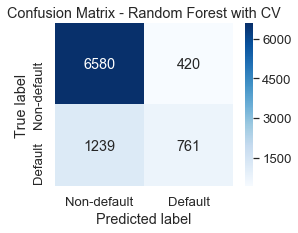

In [62]:
Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 15, 
                                     max_features= 3, n_estimators= 150, 
                                     random_state=seed)

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, cl_X, cl_y, cv=5)

# Print the 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Ran.fit(cl_X, cl_y)
y_pred = Ran.predict(x_cl_test)

#Evaluate the model
metrics.loc['accuracy','Random Forest with CV'] = accuracy_score(y_pred =y_pred, y_true = y_cl_test)
metrics.loc['precision','Random Forest with CV'] = precision_score(y_pred = y_pred, y_true = y_cl_test)
metrics.loc['recall','Random Forest with CV'] = recall_score(y_pred = y_pred, y_true = y_cl_test)

features = cl_X.columns
feature_importance = class_tree.feature_importances_
print("Variables actually used in tree construction:\n", list(features[feature_importance != 0]))
print("Misclassification error rate: %s = %s/%s" %((y_pred != y_cl_test).sum()/len(y_cl_test), (y_pred != y_cl_test).sum(), len(y_cl_test)))

#Confusion matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_cl_test,y_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest with CV");

CM = confusion_matrix(y_pred = y_pred, y_true = y_cl_test)
CMatrix(CM)

In [63]:
print('Accuracy Rate:', accuracy_score(y_pred = y_pred, y_true = y_cl_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred, y_true = y_cl_test))
print('Precision Score:', precision_score(y_pred = y_pred, y_true = y_cl_test))
print('Recall Score:', recall_score(y_pred = y_pred, y_true = y_cl_test))
print()
print(classification_report(y_pred = y_pred, y_true = y_cl_test))

Accuracy Rate: 0.8156666666666667
Misclassification Rate: 0.18433333333333335
Precision Score: 0.6443691786621507
Recall Score: 0.3805

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7000
           1       0.64      0.38      0.48      2000

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



**Good**

Random forest classifier is comprised of multiple decision trees. It creates different random subset of decision trees from the training set as its predictors and selects the best solution by means of voting. As a result, the Random Forest model avoids overfitting problems.

**Result**

According to our accuracy of 81.56%, we are doing quite well in terms of accuracy rate.
Although we have a high precision score of 64.4%, we have a low recall score of 38.05%.

Percision: 
- Out of all the predicted default, 64.4% of them are correctly identified as default.

Recall:
- Out of True default, 38.05% of them are correctly identified as default.

### 4. ADABoost

PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        6400      600   7000
DEFAULT           1229      771   2000
Total             7629     1371   9000

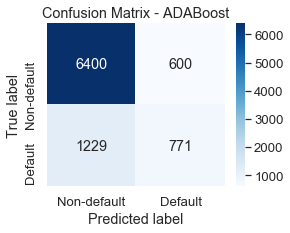

In [64]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier()
ada_cls = AdaBoostClassifier(base_estimator, n_estimators = 100, random_state = seed)
ada_cls.fit(cl_X, cl_y)
y_pred_ada = ada_cls.predict(x_cl_test)

#Evaluate the model
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_ada, y_true = y_cl_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - ADABoost");

CM = confusion_matrix(y_pred = y_pred_ada, y_true = y_cl_test)
metrics.loc['accuracy','ADABoost'] = accuracy_score(y_pred = y_pred_ada, y_true = y_cl_test)
metrics.loc['precision','ADABoost'] = precision_score(y_pred = y_pred_ada, y_true = y_cl_test)
metrics.loc['recall','ADABoost'] = recall_score(y_pred = y_pred_ada, y_true = y_cl_test)
CMatrix(CM)

In [65]:
print('Accuracy Rate:', accuracy_score(y_cl_test, y_pred_ada))
print('Misclassification Rate:', 1-accuracy_score(y_cl_test, y_pred_ada))
print('Precision Score:', precision_score(y_cl_test, y_pred_ada))
print('Recall Score:', recall_score(y_cl_test, y_pred_ada))
print()
print(classification_report(y_cl_test, y_pred_ada))

Accuracy Rate: 0.7967777777777778
Misclassification Rate: 0.2032222222222222
Precision Score: 0.562363238512035
Recall Score: 0.3855

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7000
           1       0.56      0.39      0.46      2000

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.70      0.65      0.67      9000
weighted avg       0.78      0.80      0.78      9000



**Result**

According to our accuracy of 79.68%, we are doing quite well in terms of accuracy rate.
We have a moderately high precision score of 56.23% and low recall score of 38.55%

Percision: 
- Out of all the predicted default, 56.23% of them are correctly identified as default.

Recall:
- Out of True default, 38.55% of them are correctly identified as default.

**Good**

- AdaBoost is a boosting ensemble model and works especially well with the decision tree. Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points. AdaBoost learns from the mistakes by increasing the weight of misclassified data points.
- Unlike large decision tree to the data, which amounts to fitting the data hard and potentially overfitting, boosting approach instead learns slowly.

**Bad**

Adaboost is senitive to noisy data and outliers.

### C. Naive Bayes Classifier

For Naive Bayes, we will do the following Datapreprocessing: 

- Spliting the data into train and test data with 70% and 30% Respectively. 
- Further divide the the train and test data to feature variables and target variable
- Scale the numberic data of the train data using RobustScaler()
- Use the median and interquartile range of the scaling of numberic train date to scale the test data
- Do oversampling using SMOTE

PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        2272     4728   7000
DEFAULT            289     1711   2000
Total             2561     6439   9000

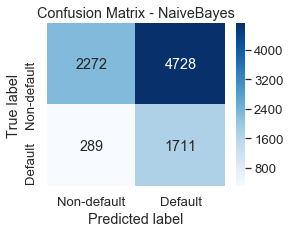

In [66]:
#Processing the data first

nbdata = A.copy(deep=True)

#Splitting the data into Train and test
seed = 1
nb_train, nb_test = train_test_split(nbdata, train_size = 0.7, random_state = seed)
nb_train.reset_index(inplace = True, drop = True)
nb_test.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_nb_train = nb_train["DEFAULT"]
x_nb_train = nb_train.loc[:,nb_train.columns!='DEFAULT']

y_nb_test = nb_test["DEFAULT"]
x_nb_test = nb_test.loc[:,nb_test.columns!='DEFAULT']

# Standardization of a dataset is a common requirement for many machine learning estimators. 
# Typically this is done by removing the mean and scaling to unit variance. 
# However, outliers can often influence the sample mean / variance in a negative way. 
# In such cases, the median and the interquartile range often give better results.

# Scaling the data
sc = RobustScaler().fit(x_nb_train[numcol])
x_nb_train[numcol] = sc.transform(x_nb_train[numcol])
x_nb_test[numcol] = sc.transform(x_nb_test[numcol])

columns=x_nb_train.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
nb_X,nb_y=Ov_sampling.fit_sample(x_nb_train,y_nb_train)
nb_X=pd.DataFrame(data=nb_X,columns=columns)
nb_y=pd.DataFrame(nb_y,columns=['DEFAULT'])

#Create an instance of the estimator
NBC = GaussianNB()

#Fit the data
seed = 1
NBC.fit(nb_X, nb_y)

#Evaluate the model
y_pred_nb = NBC.predict(x_nb_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred = y_pred_nb, y_true = y_nb_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred = y_pred_nb, y_true = y_nb_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred = y_pred_nb, y_true = y_nb_test)

#Confusion Matrix
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_nb, y_true = y_nb_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - NaiveBayes");

CM = confusion_matrix(y_pred = y_pred_nb, y_true = y_nb_test)
CMatrix(CM)

In [67]:
print('Accuracy Rate:', accuracy_score(y_pred = y_pred_nb, y_true = y_nb_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_nb, y_true = y_nb_test))
print('Precision Score:', precision_score(y_pred = y_pred_nb, y_true = y_nb_test))
print('Recall Score:', recall_score(y_pred = y_pred_nb, y_true = y_nb_test))
print()
print(classification_report(y_pred = y_pred_nb, y_true = y_nb_test))

Accuracy Rate: 0.44255555555555554
Misclassification Rate: 0.5574444444444444
Precision Score: 0.2657244913806492
Recall Score: 0.8555

              precision    recall  f1-score   support

           0       0.89      0.32      0.48      7000
           1       0.27      0.86      0.41      2000

   micro avg       0.44      0.44      0.44      9000
   macro avg       0.58      0.59      0.44      9000
weighted avg       0.75      0.44      0.46      9000



**Pros**:

- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

**Cons**:

- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict probability are not to be taken too seriously.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

**Result**

According to our accuracy of 44.25%, we are doing very badly in terms of accuracy rate.
We have a very low precision score of 26.57% and very high recall score of 85.55%

Percision: 
- Out of all the predicted default, only 26.57% of them are correctly identified as default.

Recall:
- Out of True default, 85.55% of them are correctly identified as default.

**Comment**

For our model prediction, the accuracy of way off below 50% and a very low precision score of 26.57%. Even though we had a very high recall score of 85.55%. It is still a bad model for our dataset. NaiveBayes assume the independency of predictor which is impossible that a data set comes completely uncorrelated to each other for the predicted variables. Hence, that is why NaiveBayes is not a good model for our dataset. Often, NaiveBayes is called the ideal classificier

### D. SVM

**SVM Advantages**

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have generalization in practice, the risk of over-fitting is less in SVM.
- SVM is always compared with ANN. When compared to ANN models, SVMs give better results.

**SVM Disadvantages**

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- Since the final model is not so easy to see, we can not do small calibrations to the model hence its tough to incorporate our business logic.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

### 1. SVM

For SVM, we will do the following Datapreprocessing: 

- Spliting the data into train and test data with 70% and 30% Respectively. 
- Further divide the the train and test data to feature variables and target variable
- Scale the numeric data of the train data using RobustScaler()
- Use the median and interquartile range of the scaling of numeric train date to scale the test data
- Do oversampling using SMOTE

In [68]:
from sklearn.svm import SVC
#Processing the data first

svmdata = A.copy(deep=True)

#Splitting the data into Train and test
seed = 1
svm_train, svm_test = train_test_split(svmdata, train_size = 0.7, random_state = seed)
svm_train.reset_index(inplace = True, drop = True)
svm_test.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_svm_train = svm_train["DEFAULT"]
x_svm_train = svm_train.loc[:,svm_train.columns!='DEFAULT']

y_svm_test = svm_test["DEFAULT"]
x_svm_test = svm_test.loc[:,svm_test.columns!='DEFAULT']

# Standardization of a dataset is a common requirement for many machine learning estimators. 
# Typically this is done by removing the mean and scaling to unit variance. 
# However, outliers can often influence the sample mean / variance in a negative way. 
# In such cases, the median and the interquartile range often give better results.

# Scaling the data
sc = RobustScaler().fit(x_svm_train[numcol])
x_svm_train[numcol] = sc.fit_transform(x_svm_train[numcol])
x_svm_test[numcol] = sc.transform(x_svm_test[numcol])

columns=x_svm_train.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
svm_X,svm_y=Ov_sampling.fit_sample(x_svm_train,y_svm_train)
svm_X=pd.DataFrame(data=svm_X,columns=columns)
svm_y=pd.DataFrame(svm_y,columns=['DEFAULT'])

#Fit the model
SVM_Model = SVC(gamma='auto')
SVM_Model.fit(svm_X,svm_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [84]:
#Evaluate the model
y_pred_svm = SVM_Model.predict(x_svm_test)
metrics.loc['accuracy','SVM'] = accuracy_score(y_pred = y_pred_svm, y_true = y_svm_test)
metrics.loc['precision','SVM'] = precision_score(y_pred = y_pred_svm, y_true = y_svm_test)
metrics.loc['recall','SVM'] = recall_score(y_pred = y_pred_svm, y_true = y_svm_test)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_svm, y_true = y_svm_test)
CMatrix(CM)

PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        5802     1198   7000
DEFAULT            871     1129   2000
Total             6673     2327   9000

In [70]:
print(classification_report(y_svm_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7000
           1       0.49      0.56      0.52      2000

   micro avg       0.77      0.77      0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.78      0.77      0.78      9000



Accuracy Rate: 0.7701111111111111
Misclassification Rate: 0.22988888888888892
Precision Score: 0.48517404383326174
Recall Score: 0.5645


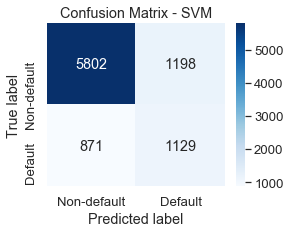

In [71]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_svm, y_true = y_svm_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_svm, y_true = y_svm_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_svm, y_true = y_svm_test))
print('Precision Score:', precision_score(y_pred = y_pred_svm, y_true = y_svm_test))
print('Recall Score:', recall_score(y_pred = y_pred_svm, y_true = y_svm_test))

**Result**

According to our accuracy of 77.01%, we are doing quite well in terms of accuracy rate.
We have quite a balance precision and recall score of 56.45% and 48.51% respectively.

Percision: 
- Out of all the predicted default, 56.45% of them are correctly identified as default.

Recall:
- Out of True default, 48.51% of them are correctly identified as default.

### 2. Tuned SVM with 5-Fold CV

In [73]:
# Set the parameters by cross-validation
svm_model_rbf = SVC(kernel = "rbf")
tuned_parameters_rbf = {'C': [0.001,0.01,0.1,1], "gamma": [0.01,0.1,1,10]}
score_rbf = "accuracy"

print("# Tuning hyper-parameters for accuracy" )
clf_rbf = GridSearchCV(svm_model_rbf, param_grid = tuned_parameters_rbf, scoring=score_rbf , cv = 5)
clf_rbf.fit(svm_X,svm_y)

means_rbf = clf_rbf.cv_results_['mean_test_score']
stds_rbf = clf_rbf.cv_results_['std_test_score']
for mean, std, params in zip(means_rbf, stds_rbf, clf_rbf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed classification report")
y_true, y_pred = y_svm_test, clf_rbf.predict(x_svm_test)
print(classification_report(y_true, y_pred))

#Evaluate the model
y_pred_svm_rbf = clf_rbf.predict(x_svm_test)
metrics.loc['accuracy','SVM with CV'] = accuracy_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test)
metrics.loc['precision','SVM with CV'] = precision_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test)
metrics.loc['recall','SVM with CV'] = recall_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_svm_rbf, y_true = y_svm_test)
CMatrix(CM)

# Tuning hyper-parameters for accuracy
0.780 (+/-0.000) for {'C': 0.001, 'gamma': 0.01}
0.780 (+/-0.000) for {'C': 0.001, 'gamma': 0.1}
0.780 (+/-0.000) for {'C': 0.001, 'gamma': 1}
0.780 (+/-0.000) for {'C': 0.001, 'gamma': 10}
0.780 (+/-0.001) for {'C': 0.01, 'gamma': 0.01}
0.791 (+/-0.006) for {'C': 0.01, 'gamma': 0.1}
0.780 (+/-0.000) for {'C': 0.01, 'gamma': 1}
0.780 (+/-0.000) for {'C': 0.01, 'gamma': 10}
0.810 (+/-0.009) for {'C': 0.1, 'gamma': 0.01}
0.811 (+/-0.007) for {'C': 0.1, 'gamma': 0.1}
0.780 (+/-0.000) for {'C': 0.1, 'gamma': 1}
0.780 (+/-0.000) for {'C': 0.1, 'gamma': 10}
0.819 (+/-0.010) for {'C': 1, 'gamma': 0.01}
0.817 (+/-0.007) for {'C': 1, 'gamma': 0.1}
0.792 (+/-0.008) for {'C': 1, 'gamma': 1}
0.779 (+/-0.001) for {'C': 1, 'gamma': 10}

Detailed classification report
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7000
           1       0.69      0.32      0.43      2000

   micro avg       0.82      0.82

PREDICTION  NO DEFAULT  DEFAULT  Total
TRUE                                  
NO DEFAULT        6714      286   7000
DEFAULT           1366      634   2000
Total             8080      920   9000

Accuracy Rate: 0.8164444444444444
Misclassification Rate: 0.18355555555555558
Precision Score: 0.6891304347826087
Recall Score: 0.317


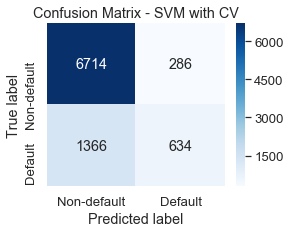

In [74]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_svm_rbf, y_true = y_svm_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM with CV");

y_pred_svm = SVM_Model.predict(x_svm_test)
metrics.loc['accuracy','SVM with CV'] = accuracy_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test)
metrics.loc['precision','SVM with CV'] = precision_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test)
metrics.loc['recall','SVM with CV'] = recall_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test)

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test))
print('Precision Score:', precision_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test))
print('Recall Score:', recall_score(y_pred = y_pred_svm_rbf, y_true = y_svm_test))

**Result**

According to our accuracy of 81.64%, we are doing well in terms of accuracy rate.
Although we have a high precision score of 68.91%, we have a low recall score of 31.7% respectively.

Percision: 
- Out of all the predicted default, 68.91% of them are correctly identified as default.

Recall:
- Out of True default, 31.7% of them are correctly identified as default.

**Comment**

After doing 5-fold cross validation(CV) to select the tuning parameters, we achieve a higher accuracy score of 81.64% as compared to without doing cross-validation of 77.011%. SVM with 5-fold CV to select tuning parameters has a higher precision score of 68.9% than VSM of 48.51%. However, SVM with CV has lower recall score of 31.7% as compared to SVM of 56.45%.

# Evaluating models

In [92]:
100*metrics

Logistic Regression Decision Trees Decision Trees with CV  \
accuracy              68.7333        79.3444                80.0333   
precision             37.9941         54.209                56.5357   
recall                   64.4           45.4                   43.9   

          Pruned Decision Trees Random Forest Random Forest with CV ADABoost  \
accuracy                79.3111       81.0556               81.5667  79.6778   
precision               54.0684       61.4253               64.4369  56.2363   
recall                    45.85         39.65                 38.05    38.55   

               SVM SVM with CV NaiveBayes  
accuracy   77.0111     81.6444    44.2556  
precision  48.5174      68.913    26.5724  
recall       56.45        31.7      85.55

Accuracy: 
-  Out of all the test data, how many % of them are correctly identified.

Percision: 
- Out of all the predicted default, how many % of them are correctly identified as default.

Recall:
- Out of True default, how many % of them are correctly identified as default.

**Comment**

- In terms of accuracy, SVM with CV has the highest score.
- In terms of precision, SVM with CV has the highest score.
- In terms of recall, Naive Bayes has the highest score. 

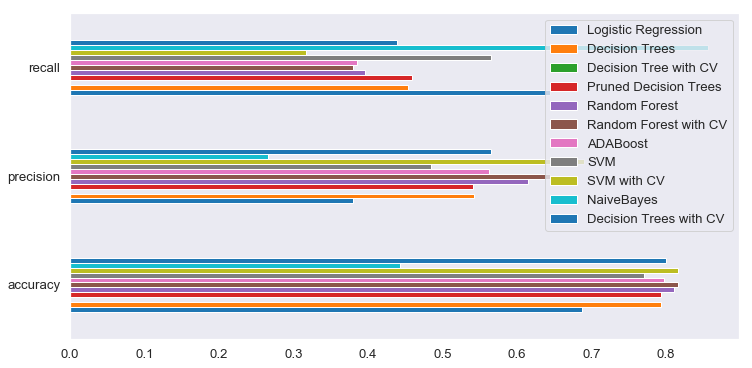

In [76]:
fig, ax = plt.subplots(figsize = (12,6))
metrics.plot(kind = 'barh', ax = ax)
ax.grid()

In [93]:
metrics

Logistic Regression Decision Trees Decision Trees with CV  \
accuracy             0.687333       0.793444               0.800333   
precision            0.379941        0.54209               0.565357   
recall                  0.644          0.454                  0.439   

          Pruned Decision Trees Random Forest Random Forest with CV  ADABoost  \
accuracy               0.793111      0.810556              0.815667  0.796778   
precision              0.540684      0.614253              0.644369  0.562363   
recall                   0.4585        0.3965                0.3805    0.3855   

                SVM SVM with CV NaiveBayes  
accuracy   0.770111    0.816444   0.442556  
precision  0.485174     0.68913   0.265724  
recall       0.5645       0.317     0.8555